In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

#plt.xkcd()

import pandas as pd
import time

idx = pd.IndexSlice
import datetime

Matplotlib is building the font cache; this may take a moment.


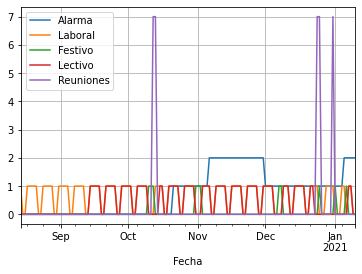

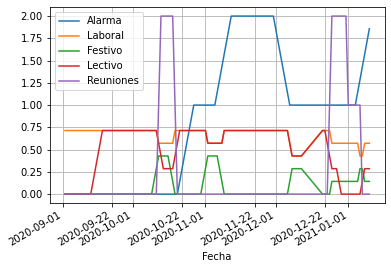

In [2]:
dateparse = lambda x: datetime.datetime.strptime(x, '%d/%m/%y')

puntos = pd.read_csv('Omega.csv',
                sep=';',
                index_col='Fecha',
                parse_dates=True,
                #infer_datetime_format=True,
                date_parser=dateparse,
                decimal=',',
               )
puntos.sort_index(inplace=True)
puntos.columns
puntos['Asintomáticos (%)'] = puntos['Asintomáticos'].copy()
puntos['Asintomáticos'] = puntos['Asintomáticos (%)']*puntos['Casos']/100
puntos['Zaragoza (%)'] = puntos['Zaragoza']/puntos['Casos']*100
puntos['UCI/Camas (%)'] = puntos['UCI ocupadas']/puntos['Camas Ocup']*100
puntos['Camas/UCI'] = puntos['Camas Ocup']/puntos['UCI ocupadas']
puntos['Casos/Camas'] = puntos['Casos']/puntos['Camas Ocup']
puntos['Camas/Casos'] = puntos['Camas Ocup']/puntos['Casos']
puntos['Camas (%)'] = puntos['Camas Ocup']/(puntos['Camas libres'])*100.
puntos['UCI (%)'] = puntos['UCI ocupadas']/(puntos['UCI libres con resp'])*100.
puntos['Día'] = np.sin((puntos['Día de la semana']-.5)*2*np.pi /7)#.plot()
puntos['Rs'] = puntos.Casos.rolling(7,center=False).sum()/puntos.Casos.shift(7).rolling(7,center=False).sum()
puntos['Rd'] = puntos.Casos/puntos.Casos.shift(1)
puntos['Bias'] = 1
puntos['Festivo'] = 0
puntos['Lectivo'] = 1

#goto
#puntos.loc['2020/10/12','Festivo'] = 1 #+ puntos.loc['2020/10/10':'2020/10/14','Festivo']
#puntos.loc['2020/11/2','Festivo'] = 1 #+ puntos.loc['2020/10/31':'2020/11/2','Festivo']
puntos.loc['2020/10/10':'2020/10/12','Festivo'] = 1 #+ puntos.loc['2020/10/10':'2020/10/14','Festivo']
puntos.loc['2020/10/31':'2020/11/2','Festivo'] = 1 #+ puntos.loc['2020/10/31':'2020/11/2','Festivo']

puntos.loc['2020/12/7':'2020/12/8',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/5':'2020/12/8','Festivo']
puntos.loc['2020/12/25',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/5':'2020/12/8','Festivo']
puntos.loc['2021/1/1',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
puntos.loc['2021/1/6',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']

puntos['Laboral'] = 1 - puntos.Festivo/1
puntos.loc[puntos[puntos['Día de la semana'].isin([6,7])].index,
           'Laboral'] = 0


#puntos.loc['2020/10/10':'2020/10/14','Laboral'] = 0
#puntos.loc['2020/10/31':'2020/11/2','Laboral'] = 0


puntos.loc['2020/10/10':'2020/10/14','Lectivo'] = 0
puntos.loc['2020/10/31':'2020/11/2','Lectivo'] = 0
puntos.loc[:'2020/9/13','Lectivo'] = 0
puntos.loc['2020/12/7':'2020/12/8','Lectivo'] = 0
puntos.loc['2020/12/23':'2020/12/25','Lectivo'] = 0
puntos.loc['2020/12/28':'2021/1/1','Lectivo'] = 0
puntos.loc['2021/1/4':'2021/1/6','Lectivo'] = 0
puntos.loc['2020/12/23':'2021/1/6','Lectivo'] = 0
puntos.loc[puntos[puntos['Día de la semana'].isin([6,7])].index,
           'Lectivo'] = 0

puntos['NoLaboral'] = 1 - puntos.Laboral
puntos['NoLectivo'] = 1 - puntos.Lectivo

puntos['Reuniones'] = 0
puntos.loc['2020/10/12':'2020/10/13','Reuniones'] = 7
#puntos.loc['2020/10/12','Reuniones'] = 1
puntos.loc['2020/12/24':'2020/12/25','Reuniones'] = 7
#puntos.loc['2020/12/25':'2020/12/26','Reuniones'] = 1
puntos.loc['2020/12/31','Reuniones'] = 7

puntos[['Alarma',
       'Laboral',
       'Festivo',
       'Lectivo',
       'Reuniones'
      ]].plot()

plt.grid()
plt.show()
semanal = puntos.rolling(7,center=False).mean().copy()
diario = puntos.copy()
puntos = puntos.rolling(7,center=False).mean().copy().dropna()

puntos[['Alarma',
       'Laboral',
       'Festivo',
       'Lectivo',
       'Reuniones'
      ]].plot()

plt.grid()
plt.show()

#puntos['Día'] = diario['Día']
#puntos['Alarma'] = diario.Alarma
#puntos['Festivo'] = diario['Festivo']
#puntos['Laboral'] = diario['Laboral']
#puntos['Reuniones'] = diario['Reuniones']
#puntos['Bias'] = diario['Bias']

In [3]:
nuevos = pd.read_csv('Omega_new.csv',
                sep=';',
                index_col='Fecha',
                parse_dates=True,
                #infer_datetime_format=True,
                date_parser=dateparse,
                decimal=',',
               )
nuevos.sort_index(inplace=True)
nuevos.columns
#nuevos['Camas Ocup'] = nuevos['Camas Ocup'].diff()
#nuevos['UCI ocupadas'] = nuevos['UCI ocupadas'].diff()
nuevos['Asintomáticos (%)'] = nuevos['Asintomáticos'].copy()
nuevos['Asintomáticos'] = nuevos['Asintomáticos (%)']*nuevos['Casos']/100
nuevos['Zaragoza (%)'] = nuevos['Zaragoza']/nuevos['Casos']*100
nuevos['UCI/Camas (%)'] = nuevos['UCI ocupadas']/nuevos['Camas Ocup']*100
nuevos['Camas/UCI'] = nuevos['Camas Ocup']/nuevos['UCI ocupadas']
nuevos['Casos/Camas'] = nuevos['Casos']/nuevos['Camas Ocup']
nuevos['Camas/Casos'] = nuevos['Camas Ocup']/nuevos['Casos']
nuevos['Camas (%)'] = nuevos['Camas Ocup']/(nuevos['Camas libres'])*100.
nuevos['UCI (%)'] = nuevos['UCI ocupadas']/(nuevos['UCI libres con resp'])*100.
nuevos['Día'] = np.sin((nuevos['Día de la semana']-.5)*2*np.pi /7)#.plot()
nuevos['Bias'] = 1
nuevos['Rs'] = nuevos.Casos.rolling(7,center=False).sum()/nuevos.Casos.shift(7).rolling(7,center=False).sum()
nuevos['Rd'] = nuevos.Casos/nuevos.Casos.shift(1)
nuevos['Festivo'] = 0
nuevos['Lectivo'] = 1

#nuevos.loc['2020/12/7':'2020/12/8',
#           'Festivo'] = 1 #+ nuevos.loc['2020/12/5':'2020/12/8','Festivo']
#nuevos.loc['2020/12/25',
#           'Festivo'] = 1 #+ nuevos.loc['2020/12/5':'2020/12/8','Festivo']
#nuevos.loc['2021/1/1',
#           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
#nuevos.loc['2021/1/6',
#           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
nuevos['Laboral'] = 1# - nuevos.Festivo/1
nuevos.loc[nuevos[nuevos['Día de la semana'].isin([6,7])].index,
           'Laboral'] = 0

#nuevos.loc['2020/12/7':'2020/12/8','Lectivo'] = 0
#nuevos.loc['2020/12/23':'2020/12/25','Lectivo'] = 0
#nuevos.loc['2020/12/28':'2021/1/1','Lectivo'] = 0
#nuevos.loc['2021/1/4':'2021/1/6','Lectivo'] = 0
#nuevos.loc['2020/12/23':'2021/1/6','Lectivo'] = 0
nuevos.loc['2021/1/11':'2021/1/12','Lectivo'] = 0
nuevos.loc[nuevos[nuevos['Día de la semana'].isin([6,7])].index,
           'Lectivo'] = 0

#nuevos.loc[:'2020/9/13','Lectivo'] = 0

nuevos['NoLaboral'] = 1 - nuevos.Laboral
nuevos['NoLectivo'] = 1 - nuevos.Lectivo



nuevos['Reuniones'] = 0 
#nuevos.loc['2020/12/24':'2020/12/25','Reuniones'] = 7
##nuevos.loc['2020/12/25':'2020/12/26','Reuniones'] = 1
#nuevos.loc['2020/12/31','Reuniones'] = 7
##nuevos.loc['2020/12/24','Reuniones'] = 1
##nuevos.loc['2020/12/25','Reuniones'] = 1
##nuevos.loc['2020/12/31','Reuniones'] = 1


nuevos.tail(10).T


Fecha                                               2021-01-11   2021-01-12  \
Día de la semana                                      1.000000     2.000000   
Casos                                               438.000000   692.000000   
test coresp                                        2237.000000  3856.000000   
Nº de pacientes a los que se ha realizado pruebas  3277.000000  3478.000000   
Tasa de positividad (%)                              19.580000    17.950000   
Asintomáticos                                       162.060000   325.240000   
Zaragoza                                            269.000000   457.000000   
1 a 14 años                                          34.000000    65.000000   
15 a 24 años                                         63.000000    92.000000   
25 a 34 años                                         52.000000    82.000000   
35 a 44 años                                         61.000000    80.000000   
45 a 54 años                                         77.000000   115.000000   
55 a 64 años                                         59.000000    86.000000   
65 a 74 años                                         28.000000    58.000000   
75 años o más                                        49.000000    78.000000   
Camas Ocup                                          477.000000   468.000000   
Camas libres                                       1353.000000  1251.000000   
UCI ocupadas                                         49.000000    51.000000   
UCI libres con resp                                  98.000000   102.000000   
Alarma                                                2.000000     2.000000   
Asintomáticos (%)                                    37.000000    47.000000   
Zaragoza (%)                                         61.415525    66.040462   
UCI/Camas (%)                                        10.272537    10.897436   
Camas/UCI                                             9.734694     9.176471   
Casos/Camas                                           0.918239     1.478632   
Camas/Casos                                           1.089041     0.676301   
Camas (%)                                            35.254989    37.410072   
UCI (%)                                              50.000000    50.000000   
Día                                                   0.433884     0.974928   
Bias                                                  1.000000     1.000000   
Rs                                                         NaN          NaN   
Rd                                                         NaN     1.579909   
Festivo                                               0.000000     0.000000   
Lectivo                                               0.000000     0.000000   
Laboral                                               1.000000     1.000000   
NoLaboral                                             0.000000     0.000000   
NoLectivo                                             1.000000     1.000000   
Reuniones                                             0.000000     0.000000   

Fecha                                              2021-01-13    2021-01-14  
Día de la semana                                     3.000000  4.000000e+00  
Casos                                              907.000000           NaN  
test coresp                                               NaN           NaN  
Nº de pacientes a los que se ha realizado pruebas         NaN           NaN  
Tasa de positividad (%)                                   NaN           NaN  
Asintomáticos                                             NaN           NaN  
Zaragoza                                                  NaN           NaN  
1 a 14 años                                               NaN           NaN  
15 a 24 años                                              NaN           NaN  
25 a 34 años                                              NaN           NaN  
35 a 44 años                                              Na

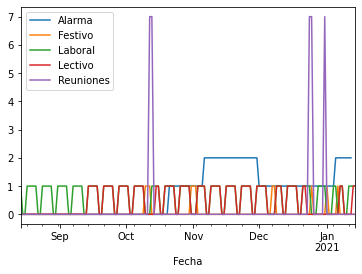

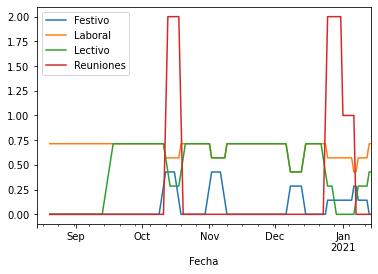

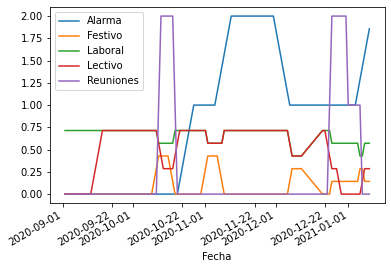

In [4]:
total = pd.concat([diario,nuevos])
total[['Alarma',
       'Festivo',
       'Laboral',
       'Lectivo',
       'Reuniones'
      ]].plot()
plt.show()
total[[
       'Festivo',
       'Laboral',
       'Lectivo',
       'Reuniones'
      ]].rolling(7,center=False).mean().plot()
plt.show()
puntos[['Alarma',
       'Festivo',
       'Laboral',
       'Lectivo',
       'Reuniones'
      ]].plot()
plt.show()

In [5]:
diario.tail()

Día de la semana  Casos  test coresp  \
Fecha                                              
2021-01-06                 3    408         2241   
2021-01-07                 4    447         2615   
2021-01-08                 5    684         3836   
2021-01-09                 6    463         2703   
2021-01-10                 7    284         1749   

            Nº de pacientes a los que se ha realizado pruebas  \
Fecha                                                           
2021-01-06                                             1112.0   
2021-01-07                                             3333.0   
2021-01-08                                             3735.0   
2021-01-09                                             1482.0   
2021-01-10                                              904.0   

            Tasa de positividad (%)  Asintomáticos  Zaragoza  1 a 14 años  \
Fecha                                                                       
2021-01-06                    18.21         216.24       290           29   
2021-01-07                    17.09         236.91       262           32   
2021-01-08                    17.81         335.16       488           63   
2021-01-09                    17.13         254.65       367           57   
2021-01-10                    16.24         147.68       194           22   

            15 a 24 años  25 a 34 años  ...           Día        Rs        Rd  \
Fecha                                   ...                                     
2021-01-06            59            67  ...  7.818315e-01  1.181534  0.715789   
2021-01-07            64            56  ...  1.224647e-16  1.211289  1.095588   
2021-01-08            94            76  ... -7.818315e-01  1.480144  1.530201   
2021-01-09            58            58  ... -9.749279e-01  1.525159  0.676901   
2021-01-10            42            43  ... -4.338837e-01  1.484324  0.613391   

            Bias  Festivo  Lectivo  Laboral  NoLaboral  NoLectivo  Reuniones  
Fecha                                                                         
2021-01-06     1        1        0      0.0        1.0          1          0  
2021-01-07     1        0        1      1.0        0.0          0          0  
2021-01-08     1        0        1      1.0        0.0          0          0  
2021-01-09     1        0        0      0.0        1.0          1          0  
2021-01-10     1        0        0      0.0        1.0          1          0  

[5 rows x 38 columns]

In [6]:
variables = [
    'Casos', 
    'test coresp', 'Tasa de positividad (%)',
    'Nº de pacientes a los que se ha realizado pruebas',
    'Asintomáticos', 'Asintomáticos (%)',
    'Zaragoza','Zaragoza (%)',
    '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más', 
    'Camas Ocup', 'Camas libres', 'Camas (%)',
    'UCI ocupadas', 'UCI libres con resp','UCI (%)',
    ##'Rs',
    'Rd',
    #'UCI/Camas (%)',
    #'Camas/UCI',
    #'Casos/Camas',
    #'Camas/Casos',
    #'Alarma',
    #'Día', 
    #'Bias',
]

In [7]:
def find_weekend_indices(datetime_array):
    indices=[]
    for i in range(len(datetime_array)):
        #if datetime_array[i].day_name() in ['Saturday', 'Sunday']:
        if datetime_array[i].weekday()+1 in [6,7]:
            indices.append(i)
    return indices

weekend_indices = find_weekend_indices(puntos.index)

def highlight_datetimes(index, ax,items=True):
    indices = find_weekend_indices(index)
    i = 0
    while i < len(indices):
        ax.axvspan(index[indices[i]], index[indices[i] + 1], facecolor='gray', edgecolor='none', alpha=.05)
        i += 1
    if items:
        ax.axvline(x=datetime.datetime(2020, 3, 8),ls='--',linewidth=4, color='purple',alpha=.4,label='Manifestación y Vox')
        ax.axvline(x=datetime.datetime(2020, 3, 9),linewidth=4, color='green',alpha=.4,label='PV y MD Educativo')
        ax.axvline(x=datetime.datetime(2020, 3, 12),linewidth=4, color='yellow',alpha=.4,label='AR Educativo')
        ax.axvline(x=datetime.datetime(2020, 3, 15),linewidth=4, color='r',alpha=.4,label='Estado de alarma')
        ax.axvline(x=datetime.datetime(2020, 3, 28),linewidth=4, color='brown',alpha=.4,label='Servicios no esenciales')
        ax.axvline(x=datetime.datetime(2020, 4, 26),ls='--',linewidth=4, color='orange',alpha=.4,label='Niños a la calle')
        ax.axvline(x=datetime.datetime(2020, 5, 4),ls='--',linewidth=4, color='lightblue',alpha=.4,label='Fase 0')
        ax.axvline(x=datetime.datetime(2020, 5, 11),ls='--',linewidth=4, color='blue',alpha=.4,label='Fase 1')
        ax.axvline(x=datetime.datetime(2020, 5, 25),ls='--',linewidth=4, color='darkblue',alpha=.4,label='Fase 2')
        ax.axvline(x=datetime.datetime(2020, 6, 8),ls='--',linewidth=4, color='lightgreen',alpha=.4,label='Fase 3')
        ax.axvline(x=datetime.datetime(2020, 6, 21),ls='--',linewidth=4, color='black',alpha=.4,label='Nueva Normalidad')
        ax.axvline(x=datetime.datetime(2020, 9, 14),linewidth=4, color='yellow',alpha=.4,label='Apertura AR Educativo')
        ax.axvline(x=datetime.datetime(2020, 10, 25),linewidth=4, color='darkred',alpha=.4,label='Nivel III')
        ax.axvline(x=datetime.datetime(2020, 11, 8),linewidth=4, color='brown',alpha=.4,label='nivel III Agravado')



In [8]:
repartoDiaSemana = diario[['Día de la semana']].join(diario[variables].divide(
                                                                    semanal[variables])
                                                    ).dropna().groupby(['Día de la semana']).mean()

#diario['Camas Ocup'] = diario['Camas Ocup'].diff()
#diario['UCI ocupadas'] = diario['UCI ocupadas'].diff()
#semanal['Camas Ocup'] = semanal['Camas Ocup'].diff()
#semanal['UCI ocupadas'] = semanal['UCI ocupadas'].diff()
repartoDiaSemana

Casos  test coresp  Tasa de positividad (%)  \
Día de la semana                                                   
1                 0.837265     0.845838                 0.985010   
2                 1.055295     1.086519                 0.955823   
3                 1.100693     1.156692                 0.949616   
4                 1.223858     1.156693                 1.061015   
5                 1.150114     1.179398                 0.978078   
6                 0.970236     0.915713                 1.052249   
7                 0.749845     0.674892                 1.093361   

                  Nº de pacientes a los que se ha realizado pruebas  \
Día de la semana                                                      
1                                                          1.104949   
2                                                          1.252625   
3                                                          1.199189   
4                                                          1.189812   
5                                                          1.279524   
6                                                          0.585932   
7                                                          0.388020   

                  Asintomáticos  Asintomáticos (%)  Zaragoza  Zaragoza (%)  \
Día de la semana                                                             
1                      0.819515           0.976574  0.792900      0.947665   
2                      0.984515           0.934855  1.031746      0.973220   
3                      1.061007           0.952007  1.084064      0.987686   
4                      1.195440           0.979549  1.218619      1.000466   
5                      1.168291           1.017080  1.158249      1.016809   
6                      1.105499           1.132087  1.004062      1.033610   
7                      0.756315           1.010676  0.757732      1.007286   

                  1 a 14 años  15 a 24 años  ...  55 a 64 años  65 a 74 años  \
Día de la semana                             ...                               
1                    0.720972      0.835779  ...      0.890861      0.871126   
2                    1.056247      1.005256  ...      1.177930      0.982439   
3                    1.067601      1.089869  ...      1.131315      1.094279   
4                    1.243752      1.264271  ...      1.124599      1.180232   
5                    1.206798      1.160151  ...      1.125184      1.176868   
6                    1.060712      1.036321  ...      0.943572      0.933672   
7                    0.663861      0.743822  ...      0.746482      0.809066   

                  75 años o más  Camas Ocup  Camas libres  Camas (%)  \
Día de la semana                                                       
1                      0.891984    1.025716      0.928791   1.132907   
2                      0.957367    1.014028      0.940635   1.066859   
3                      1.108832    0.992380      0.947416   1.041457   
4                      1.239533    1.009460      0.961613   1.043429   
5                      1.097039    0.958256      1.092139   0.869308   
6                      0.975025    0.983536      1.091279   0.889567   
7                      0.816040    1.032521      1.042474   0.979051   

                  UCI ocupadas  UCI libres con resp   UCI (%)        Rd  
Día de la semana                                                         
1                     0.997871             1.060071  0.941537  1.135661  
2                     0.994330             1.019237  0.977301  1.210755  
3                     1.003044             0.976378  1.026598  1.046023  
4                     0.999971             0.964556  1.042122  1.092576  
5                     0.990992             0.989798  0.999227  0.937702  
6                     0.994696             0.994084  0.997728  0.837452  
7                     1.021657             1.079223  0.946021  0.753395  

[7 rows x 23 columns]

In [9]:
diario.Casos.shift(0).rolling(7,center=False).sum()/diario.Casos.shift(7).rolling(7,center=False).sum()

Fecha
2020-08-14         NaN
2020-08-15         NaN
2020-08-16         NaN
2020-08-17         NaN
2020-08-18         NaN
                ...   
2021-01-06    1.181534
2021-01-07    1.211289
2021-01-08    1.480144
2021-01-09    1.525159
2021-01-10    1.484324
Name: Casos, Length: 150, dtype: float64

In [10]:
nuevos.Casos/nuevos.Casos.shift(1)

Fecha
2021-01-11         NaN
2021-01-12    1.579909
2021-01-13    1.310694
2021-01-14         NaN
Name: Casos, dtype: float64

In [11]:

#nuevos['Camas Ocup'] = nuevos['Camas Ocup'].diff()
#nuevos['UCI ocupadas'] = nuevos['UCI ocupadas'].diff()
#puntos['Camas Ocup'] = puntos['Camas Ocup'].diff()
#puntos['UCI ocupadas'] = puntos['UCI ocupadas'].diff()
total = pd.concat([diario,nuevos])
#puntos = total.rolling(7,center=False).mean().copy().dropna()
diario[variables].divide(semanal[variables])#.columns

Casos  test coresp  Tasa de positividad (%)  \
Fecha                                                        
2020-08-14       NaN          NaN                      NaN   
2020-08-15       NaN          NaN                      NaN   
2020-08-16       NaN          NaN                      NaN   
2020-08-17       NaN          NaN                      NaN   
2020-08-18       NaN          NaN                      NaN   
...              ...          ...                      ...   
2021-01-06  1.260927     1.204006                 1.076969   
2021-01-07  1.337751     1.360967                 1.009962   
2021-01-08  1.668293     1.667101                 1.011275   
2021-01-09  1.038117     1.088790                 0.954090   
2021-01-10  0.626734     0.690836                 0.907480   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
Fecha                                                                          
2020-08-14                                                NaN            NaN   
2020-08-15                                                NaN            NaN   
2020-08-16                                                NaN            NaN   
2020-08-17                                                NaN            NaN   
2020-08-18                                                NaN            NaN   
...                                                       ...            ...   
2021-01-06                                           0.645306       1.408205   
2021-01-07                                           1.724199       1.440282   
2021-01-08                                           1.593576       1.640678   
2021-01-09                                           0.641697       1.128825   
2021-01-10                                           0.394280       0.641235   

            Asintomáticos (%)  Zaragoza  Zaragoza (%)  1 a 14 años  \
Fecha                                                                
2020-08-14                NaN       NaN           NaN          NaN   
2020-08-15                NaN       NaN           NaN          NaN   
2020-08-16                NaN       NaN           NaN          NaN   
2020-08-17                NaN       NaN           NaN          NaN   
2020-08-18                NaN       NaN           NaN          NaN   
...                       ...       ...           ...          ...   
2021-01-06           1.138037  1.256966      0.998297     1.245399   
2021-01-07           1.104167  1.160025      0.858971     1.357576   
2021-01-08           0.985632  1.753593      1.062780     1.995475   
2021-01-09           1.090652  1.173059      1.132510     1.511364   
2021-01-10           1.022472  0.613647      0.985568     0.601562   

            15 a 24 años  ...  55 a 64 años  65 a 74 años  75 años o más  \
Fecha                     ...                                              
2020-08-14           NaN  ...           NaN           NaN            NaN   
2020-08-15           NaN  ...           NaN           NaN            NaN   
2020-08-16           NaN  ...           NaN           NaN            NaN   
2020-08-17           NaN  ...           NaN           NaN            NaN   
2020-08-18           NaN  ...           NaN           NaN            NaN   
...                  ...  ...           ...           ...            ...   
2021-01-06      1.501818  ...      1.254072      1.152439       0.840000   
2021-01-07      1.478548  ...      1.326797      1.408284       1.203509   
2021-01-08      1.695876  ...      1.930412      1.707317       1.518072   
2021-01-09      0.983051  ...      0.910165      1.110132       0.759531   
2021-01-10      0.685315  ...      0.525822      0.565022       0.767123   

            Camas Ocup  Camas libres  Camas (%)  UCI ocupadas  \
Fecha                                                           
2020-08-14         NaN           NaN        NaN           NaN   
2020-08-15         NaN           NaN        NaN           NaN   
2020-08

Casos  test coresp  Tasa de positividad (%)  \
Fecha                                                          
2020-09-03  272.000000  2633.857143                10.348571   
2020-09-04  260.142857  2490.428571                10.432857   
2020-09-05  281.000000  2562.000000                10.852857   
2020-09-06  287.428571  2528.428571                11.450000   
2020-09-07  279.142857  2458.285714                11.434286   
...                ...          ...                      ...   
2021-01-06  323.571429  1861.285714                16.908571   
2021-01-07  334.142857  1921.428571                16.921429   
2021-01-08  410.000000  2301.000000                17.611429   
2021-01-09  446.000000  2482.571429                17.954286   
2021-01-10  453.142857  2531.714286                17.895714   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
Fecha                                                                          
2020-09-03                                        2139.714286     159.558571   
2020-09-04                                        2164.571429     154.922857   
2020-09-05                                        2109.428571     173.357143   
2020-09-06                                        2229.857143     169.327143   
2020-09-07                                        2277.000000     162.124286   
...                                                       ...            ...   
2021-01-06                                        1723.214286     153.557143   
2021-01-07                                        1933.071429     164.488571   
2021-01-08                                        2343.785714     204.281429   
2021-01-09                                        2309.500000     225.588571   
2021-01-10                                        2292.785714     230.305714   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
Fecha                                                                  
2020-09-03          58.571429  204.000000     74.923581    29.571429   
2020-09-04          59.714286  192.714286     74.085108    27.857143   
2020-09-05          60.571429  216.000000     76.118888    30.714286   
2020-09-06          57.285714  224.000000     77.348069    31.571429   
2020-09-07          56.142857  215.428571     76.327781    30.000000   
...                       ...         ...           ...          ...   
2021-01-06          46.571429  230.714286     71.199651    23.285714   
2021-01-07          48.000000  225.857143     68.236281    23.571429   
2021-01-08          49.714286  278.285714     67.130575    31.571429   
2021-01-09          50.428571  312.857143     69.991140    37.714286   
2021-01-10          50.857143  316.142857     69.310131    36.571429   

            15 a 24 años  ...  55 a 64 años  65 a 74 años  75 años o más  \
Fecha                     ...                                              
2020-09-03     29.142857  ...     37.428571     23.428571      36.000000   
2020-09-04     29.000000  ...     37.285714     21.857143      34.714286   
2020-09-05     32.285714  ...     37.428571     23.428571      39.571429   
2020-09-06     32.142857  ...     40.428571     22.428571      39.857143   
2020-09-07     30.142857  ...     39.142857     20.857143      42.428571   
...                  ...  ...           ...           ...            ...   
2021-01-06     39.285714  ...     43.857143     23.428571      42.857143   
2021-01-07     43.285714  ...     43.714286     24.142857      40.714286   
2021-01-08     55.428571  ...     55.428571     29.285714      47.428571   
2021-01-09     59.000000  ...     60.428571     32.428571      48.714286   
2021-01-10     61.285714  ...     60.857143     31.857143      52.142857   

            Camas Ocup  Camas libres  Camas (%)  UCI ocupadas  \
Fecha                                                           
2020-09-03  497.428571   1493.857143  33.316262     67.000000   
2020-09-04  489.571429

<AxesSubplot:xlabel='Fecha'>

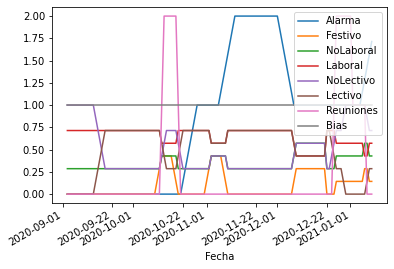

In [12]:
entradas = ['Alarma','Laboral','Lectivo','Reuniones','Festivo','Bias']
entradas = ['Alarma','Festivo','NoLaboral','Laboral','NoLectivo','Lectivo','Reuniones','Bias']
#entradas = ['Alarma','Festivo','Laboral','Lectivo','Reuniones','Bias']
X_prima = puntos[variables].iloc[1:].T
Omega       = puntos[variables+entradas].shift(1).iloc[1:].T
display(X_prima.T)
display(Omega.T[entradas].plot())


In [13]:
%%time 
Omega_pinv = pd.DataFrame(np.linalg.pinv(Omega),index=Omega.columns,columns=Omega.index)#.shape
Omega_pinv

CPU times: user 6.11 ms, sys: 5.07 ms, total: 11.2 ms
Wall time: 20.9 ms


Casos  test coresp  Tasa de positividad (%)  \
Fecha                                                        
2020-09-03  0.003862    -0.000235                -0.046673   
2020-09-04  0.000210     0.000238                 0.009593   
2020-09-05  0.004198     0.000114                 0.010536   
2020-09-06 -0.002978     0.000138                -0.003830   
2020-09-07  0.002415    -0.000058                -0.003032   
...              ...          ...                      ...   
2021-01-06 -0.005046     0.000107                 0.015078   
2021-01-07  0.001939     0.000157                 0.037459   
2021-01-08  0.007634     0.000073                 0.039759   
2021-01-09 -0.003623    -0.000189                -0.032428   
2021-01-10  0.002261     0.000262                 0.058332   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
Fecha                                                                          
2020-09-03                                          -0.000121      -0.002644   
2020-09-04                                          -0.000169      -0.001454   
2020-09-05                                          -0.000042      -0.003568   
2020-09-06                                          -0.000150      -0.002018   
2020-09-07                                           0.000096       0.001633   
...                                                       ...            ...   
2021-01-06                                          -0.000045      -0.000930   
2021-01-07                                          -0.000039       0.000522   
2021-01-08                                           0.000067       0.002999   
2021-01-09                                           0.000003      -0.000131   
2021-01-10                                          -0.000084      -0.002509   

            Asintomáticos (%)  Zaragoza  Zaragoza (%)  1 a 14 años  \
Fecha                                                                
2020-09-03           0.015079 -0.001840      0.002530    -0.001439   
2020-09-04           0.014694 -0.000946      0.002815    -0.005849   
2020-09-05           0.022760  0.001065     -0.011799    -0.004400   
2020-09-06           0.022649 -0.000867      0.002993     0.001695   
2020-09-07          -0.008191 -0.006891      0.036090     0.002310   
...                       ...       ...           ...          ...   
2021-01-06           0.005283 -0.000754     -0.000936     0.005049   
2021-01-07          -0.002626 -0.005241      0.024178     0.001312   
2021-01-08          -0.018233 -0.006454      0.018908    -0.004270   
2021-01-09           0.005165  0.002570     -0.017924    -0.001760   
2021-01-10           0.014865  0.007082     -0.019651    -0.009861   

            15 a 24 años  ...   UCI (%)        Rd    Alarma   Festivo  \
Fecha                     ...                                           
2020-09-03     -0.000962  ... -0.001532 -0.218323  0.214140  0.304657   
2020-09-04     -0.002856  ...  0.002378  0.372244  0.064051  0.105051   
2020-09-05     -0.000790  ...  0.002688 -0.547414  0.127992  0.107307   
2020-09-06      0.007707  ...  0.001332  0.263811 -0.150132 -0.082142   
2020-09-07      0.002832  ... -0.004098  0.212428 -0.152725 -0.127385   
...                  ...  ...       ...       ...       ...       ...   
2021-01-06      0.002300  ...  0.001420  0.039077 -0.271596 -0.337659   
2021-01-07     -0.002083  ... -0.000430 -0.227463 -0.098288 -0.351161   
2021-01-08     -0.005905  ... -0.003907 -0.296390  0.164146  0.080409   
2021-01-09      0.005032  ... -0.003353  0.459909 -0.037867  0.124730   
2021-01-10     -0.006206  ...  0.001516 -0.222981  0.250575  0.143047   

            NoLaboral   Laboral  NoLectivo   Lectivo  Reuniones      Bias  
Fecha                                                                      
2020-09-03  -0.194377  0.702553   0.261554  0.246622   0.003932  0.508176  
2020-09-04  -0.503002 -0.250045  -0.433946 -0.319102   0.019742 -0.753047  
20


$$ X' = G_{nx(n+q)} \Omega \Leftrightarrow G_{nx(n+q)} = X'\Omega^\dagger $$

In [14]:
celdas = X_prima.index


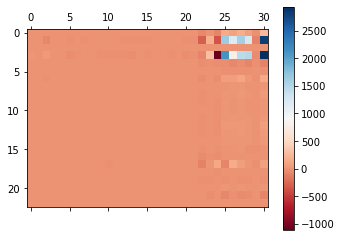

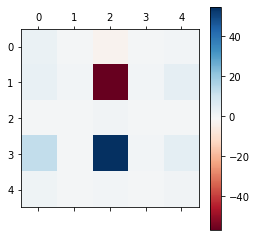

In [15]:
G = X_prima.dot( Omega_pinv)
plt.matshow(G, cmap=plt.cm.RdBu)
plt.colorbar()
plt.show()
plt.matshow(G.iloc[:5,:5], cmap=plt.cm.RdBu)
plt.colorbar()
plt.show()

Step 1
------

$$\Omega = \tilde U \tilde \Sigma \tilde V^* $$

In [16]:
%%time
U_tilde,kS_tilde,V_tilde_star = np.linalg.svd(Omega,
                          full_matrices=False)

#kS = np.einsum('ij,j->ij',
#                              np.identity(len(Sigma)),
#                              Sigma
#                             )
Sigma_tilde = pd.DataFrame(np.diag(kS_tilde),
                      index=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                      columns=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                     )

V_tilde_star = pd.DataFrame(V_tilde_star,
                            columns=Omega.columns,
                            index=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                           )

U_tilde = pd.DataFrame(U_tilde,index=Omega.index,
                      columns=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],)



print("{} = {}·{}·{}".format(Omega.shape,U_tilde.shape,Sigma_tilde.shape,V_tilde_star.shape))

(31, 122) = (31, 31)·(31, 31)·(31, 122)
CPU times: user 3.75 ms, sys: 2.06 ms, total: 5.81 ms
Wall time: 6.49 ms


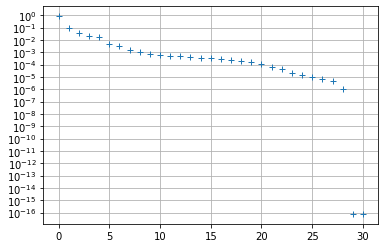

In [17]:
plt.plot(kS_tilde/kS_tilde.sum(),'+')

plt.yscale('symlog', linthresh=1.e-29)
#plt.xscale('symlog', linthreshx=50)
#plt.xlim(-1,210)
plt.grid()

In [18]:
r_tilde=np.min([len(X_prima.columns),len(X_prima.index)])#205#33#25#41#65#11#43#33
corRed_tilde = ['$P_{{{}}}$'.format(i) for i in range(r_tilde)]

Step 2
-------
$$ G_{nx(n+q)} = X'\Omega^\dagger = X' \tilde V \tilde \Sigma^{-1}\tilde U^*$$

$$ [{A}_{nxn},B_{nxq}] = [ X' \tilde V \tilde \Sigma^{-1}\tilde U^*_1, X' \tilde V \tilde \Sigma^{-1}\tilde U^*_2]$$

In [19]:
U_tilde

$P_{0}$   $P_{1}$  \
Casos                                             -0.102850 -0.210587   
test coresp                                       -0.699784 -0.350759   
Tasa de positividad (%)                           -0.002763  0.002273   
Nº de pacientes a los que se ha realizado pruebas -0.634480  0.070222   
Asintomáticos                                     -0.052576 -0.113450   
Asintomáticos (%)                                 -0.010054  0.022269   
Zaragoza                                          -0.070657 -0.130123   
Zaragoza (%)                                      -0.013727  0.034805   
1 a 14 años                                       -0.010750 -0.020512   
15 a 24 años                                      -0.011825 -0.024515   
25 a 34 años                                      -0.011803 -0.024245   
35 a 44 años                                      -0.013773 -0.027746   
45 a 54 años                                      -0.016219 -0.033623   
55 a 64 años                                      -0.013228 -0.028689   
65 a 74 años                                      -0.007889 -0.015583   
75 años o más                                     -0.013145 -0.021186   
Camas Ocup                                        -0.121600  0.009620   
Camas libres                                      -0.267883  0.887830   
Camas (%)                                         -0.009504 -0.007291   
UCI ocupadas                                      -0.015881  0.013367   
UCI libres con resp                               -0.012061  0.050139   
UCI (%)                                           -0.028499 -0.008304   
Rd                                                -0.000208  0.000540   
Alarma                                            -0.000163  0.000285   
Festivo                                           -0.000016  0.000033   
NoLaboral                                         -0.000065  0.000200   
Laboral                                           -0.000133  0.000259   
NoLectivo                                         -0.000090  0.000482   
Lectivo                                           -0.000108 -0.000023   
Reuniones                                         -0.000044  0.000546   
Bias                                              -0.000198  0.000459   

                                                        $P_{2}$   $P_{3}$  \
Casos                                             -9.524513e-02 -0.696098   
test coresp                                       -5.161476e-01  0.315164   
Tasa de positividad (%)                           -7.687722e-04 -0.020560   
Nº de pacientes a los que se ha realizado pruebas  6.381283e-01 -0.091836   
Asintomáticos                                     -5.590155e-02 -0.354647   
Asintomáticos (%)                                 -3.534672e-03  0.003044   
Zaragoza                                          -9.050625e-02 -0.434297   
Zaragoza (%)                                      -1.361597e-02  0.007005   
1 a 14 años                                       -1.038268e-02 -0.035657   
15 a 24 años                                      -2.731898e-02 -0.097730   
25 a 34 años                                      -1.606314e-02 -0.084414   
35 a 44 años                                      -1.404617e-02 -0.097546   
45 a 54 años                                      -1.258571e-02 -0.122164   
55 a 64 años                                      -1.264998e-02 -0.099893   
65 a 74 años                                      -4.817113e-03 -0.050823   
75 años o más                                      5.312329e-03 -0.059398   
Camas Ocup                                         4.399613e-01  0.076709   
Camas libres                                      -3.025911e-01 -0.160788   
Camas (%)                                          3.897700e-02  0.001325   
UCI ocupadas                                       5.972632e-02  0.031184   
UCI libres con resp                               -2.033829e-02 -0.034439   
UCI (%)              

In [20]:
%%time
U_tilde_r = U_tilde.loc[:,corRed_tilde]
Sigma_tilde_r = Sigma_tilde.loc[corRed_tilde,corRed_tilde]

Sigma_tilde_inv = pd.DataFrame(np.einsum('ij,j->ij',
                              np.identity(len(kS_tilde)),
                              1./kS_tilde
                             ),
                      index=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                      columns=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                     )

Sigma_tilde_inv_r = Sigma_tilde_inv.loc[corRed_tilde,corRed_tilde]
V_tilde = V_tilde_star.T
V_tilde_r = V_tilde.loc[:,corRed_tilde]

U_tilde_1 = U_tilde.loc[X_prima.index]
U_tilde_2 = U_tilde.loc[['Alarma']]
U_tilde_1_r = U_tilde_1.loc[:,corRed_tilde]
U_tilde_2_r = U_tilde_2.loc[:,corRed_tilde]

CPU times: user 13.3 ms, sys: 1.28 ms, total: 14.5 ms
Wall time: 16 ms


In [21]:
%%time
G = X_prima.dot(V_tilde_r).dot(Sigma_tilde_inv_r).dot(U_tilde_r.T)
G

CPU times: user 3.86 ms, sys: 2.13 ms, total: 5.99 ms
Wall time: 10.2 ms


Casos  test coresp  \
Casos                                              1.735133    -0.023609   
test coresp                                       -1.025797     0.439833   
Tasa de positividad (%)                            0.016973     0.001327   
Nº de pacientes a los que se ha realizado pruebas  6.971225    -0.162831   
Asintomáticos                                      1.039608    -0.026196   
Asintomáticos (%)                                  0.159560     0.000827   
Zaragoza                                           0.709827    -0.019173   
Zaragoza (%)                                      -0.021897     0.001484   
1 a 14 años                                       -0.016508    -0.005758   
15 a 24 años                                       0.161352     0.000665   
25 a 34 años                                       0.078516    -0.000465   
35 a 44 años                                       0.089011     0.005366   
45 a 54 años                                       0.177013    -0.010936   
55 a 64 años                                       0.053660    -0.000609   
65 a 74 años                                       0.053027    -0.001010   
75 años o más                                      0.201921    -0.005249   
Camas Ocup                                         0.599805    -0.000929   
Camas libres                                       0.873291     0.090540   
Camas (%)                                          0.065633    -0.003671   
UCI ocupadas                                       0.087624     0.005368   
UCI libres con resp                               -0.080085    -0.004875   
UCI (%)                                            0.388611     0.012774   
Rd                                                 0.002435    -0.000051   

                                                   Tasa de positividad (%)  \
Casos                                                             2.150177   
test coresp                                                     -42.256515   
Tasa de positividad (%)                                           1.158350   
Nº de pacientes a los que se ha realizado pruebas                22.709239   
Asintomáticos                                                     2.071530   
Asintomáticos (%)                                                 0.834958   
Zaragoza                                                          0.542995   
Zaragoza (%)                                                     -0.245931   
1 a 14 años                                                      -0.571748   
15 a 24 años                                                      1.269013   
25 a 34 años                                                      0.882367   
35 a 44 años                                                      1.752880   
45 a 54 años                                                     -0.342918   
55 a 64 años                                                      0.733331   
65 a 74 años                                                      0.003391   
75 años o más                                                     0.032036   
Camas Ocup                                                        3.724180   
Camas libres                                                      7.656595   
Camas (%)                                                        -0.154357   
UCI ocupadas                                                      1.351945   
UCI libres con resp                                              -1.609625   
UCI (%)                                                           4.146086   
Rd                                                               -0.001170   

                                                   Nº de pacientes a los que se ha realizado pruebas  \
Casos                                                                                       0.022942   
test coresp                                                                                 0.310260   
Tasa de positividad (%)                     

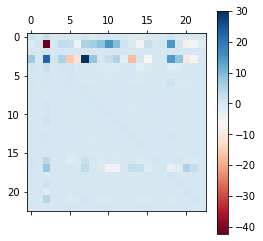

<ipython-input-22-6a6c891ec5b4>:12: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.matshow(A, cmap=plt.cm.RdBu,norm=colors.SymLogNorm(linthresh=1.e-3, linscale=1.0,


Casos  test coresp  \
Casos                                              1.735133    -0.023609   
test coresp                                       -1.025797     0.439833   
Tasa de positividad (%)                            0.016973     0.001327   
Nº de pacientes a los que se ha realizado pruebas  6.971225    -0.162831   
Asintomáticos                                      1.039608    -0.026196   
Asintomáticos (%)                                  0.159560     0.000827   
Zaragoza                                           0.709827    -0.019173   
Zaragoza (%)                                      -0.021897     0.001484   
1 a 14 años                                       -0.016508    -0.005758   
15 a 24 años                                       0.161352     0.000665   
25 a 34 años                                       0.078516    -0.000465   
35 a 44 años                                       0.089011     0.005366   
45 a 54 años                                       0.177013    -0.010936   
55 a 64 años                                       0.053660    -0.000609   
65 a 74 años                                       0.053027    -0.001010   
75 años o más                                      0.201921    -0.005249   
Camas Ocup                                         0.599805    -0.000929   
Camas libres                                       0.873291     0.090540   
Camas (%)                                          0.065633    -0.003671   
UCI ocupadas                                       0.087624     0.005368   
UCI libres con resp                               -0.080085    -0.004875   
UCI (%)                                            0.388611     0.012774   
Rd                                                 0.002435    -0.000051   

                                                   Tasa de positividad (%)  \
Casos                                                             2.150177   
test coresp                                                     -42.256515   
Tasa de positividad (%)                                           1.158350   
Nº de pacientes a los que se ha realizado pruebas                22.709239   
Asintomáticos                                                     2.071530   
Asintomáticos (%)                                                 0.834958   
Zaragoza                                                          0.542995   
Zaragoza (%)                                                     -0.245931   
1 a 14 años                                                      -0.571748   
15 a 24 años                                                      1.269013   
25 a 34 años                                                      0.882367   
35 a 44 años                                                      1.752880   
45 a 54 años                                                     -0.342918   
55 a 64 años                                                      0.733331   
65 a 74 años                                                      0.003391   
75 años o más                                                     0.032036   
Camas Ocup                                                        3.724180   
Camas libres                                                      7.656595   
Camas (%)                                                        -0.154357   
UCI ocupadas                                                      1.351945   
UCI libres con resp                                              -1.609625   
UCI (%)                                                           4.146086   
Rd                                                               -0.001170   

                                                   Nº de pacientes a los que se ha realizado pruebas  \
Casos                                                                                       0.022942   
test coresp                                                                                 0.310260   
Tasa de positividad (%)                     

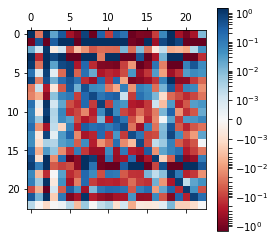

In [22]:
A = G.loc[:,celdas]
B = G.loc[:,entradas]
#D = G.loc[:,salidas]
#A_tilde[:11,:11].round(0).astype(int)

#import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.matshow(A, cmap=plt.cm.RdBu)#, vmin=-100.0, vmax=100.0)
plt.colorbar()
plt.show()
plt.matshow(A, cmap=plt.cm.RdBu,norm=colors.SymLogNorm(linthresh=1.e-3, linscale=1.0,
                                              vmin=-1.5, vmax=1.5))
plt.colorbar()
A

(23, 122) = (23, 23)·(23, 23)·(23, 122)
CPU times: user 168 ms, sys: 5.36 ms, total: 173 ms
Wall time: 120 ms


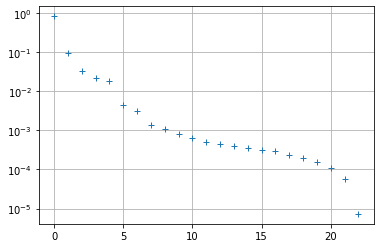

In [23]:
%%time
U_hat,kS_hat,V_hat_star = np.linalg.svd(X_prima,
                          full_matrices=False)

#kS = np.einsum('ij,j->ij',
#                              np.identity(len(Sigma)),
#                              Sigma
#                             )
Sigma_hat = pd.DataFrame(np.diag(kS_hat),
                      index=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                      columns=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                     )

V_hat_star = pd.DataFrame(V_hat_star,
                            columns=X_prima.columns,
                            index=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                           )

U_hat = pd.DataFrame(U_hat,index=X_prima.index,
                      columns=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],)

V_hat = V_hat_star.T


print("{} = {}·{}·{}".format(X_prima.shape,U_hat.shape,Sigma_hat.shape,V_hat_star.shape))
#plt.plot(Sigma/np.sum(Sigma),'+')
plt.plot(kS_hat/kS_hat.sum(),'+')

plt.yscale('symlog', linthresh=1.e-22)
#plt.xscale('symlog', linthreshx=50)
#plt.xlim(-1,200)
plt.grid()

In [24]:
#GOTO0
thresh = 1.e-4
#np.where(kS_hat/kS_hat.sum()<thresh)[0][0]
try:
    print(np.where(kS_hat/kS_hat.sum()<thresh)[0][0])#7#33#25#41#65#11#43#33  )
except:
    print(len(kS_hat))

21


In [25]:
r=len(kS_hat)
try:
    r = np.where(kS_hat/kS_hat.sum()<thresh)[0][0]#7#33#25#41#65#11#43#33  
except:
    r=len(kS_hat)
corRed = ['$\tilde x^{{{}}}$'.format(i) for i in range(r)]
U_hat.loc[:,corRed]

$\tilde x^{0}$  \
Casos                                                   -0.103080   
test coresp                                             -0.699622   
Tasa de positividad (%)                                 -0.002772   
Nº de pacientes a los que se ha realizado pruebas       -0.634600   
Asintomáticos                                           -0.052666   
Asintomáticos (%)                                       -0.010042   
Zaragoza                                                -0.070803   
Zaragoza (%)                                            -0.013718   
1 a 14 años                                             -0.010758   
15 a 24 años                                            -0.011865   
25 a 34 años                                            -0.011838   
35 a 44 años                                            -0.013806   
45 a 54 años                                            -0.016256   
55 a 64 años                                            -0.013257   
65 a 74 años                                            -0.007901   
75 años o más                                           -0.013168   
Camas Ocup                                              -0.121472   
Camas libres                                            -0.267937   
Camas (%)                                               -0.009494   
UCI ocupadas                                            -0.015852   
UCI libres con resp                                     -0.012131   
UCI (%)                                                 -0.028389   
Rd                                                      -0.000209   

                                                   $\tilde x^{1}$  \
Casos                                                   -0.208174   
test coresp                                             -0.352472   
Tasa de positividad (%)                                  0.002369   
Nº de pacientes a los que se ha realizado pruebas        0.071609   
Asintomáticos                                           -0.112502   
Asintomáticos (%)                                        0.022137   
Zaragoza                                                -0.128602   
Zaragoza (%)                                             0.034698   
1 a 14 años                                             -0.020414   
15 a 24 años                                            -0.024103   
25 a 34 años                                            -0.023891   
35 a 44 años                                            -0.027401   
45 a 54 años                                            -0.033229   
55 a 64 años                                            -0.028379   
65 a 74 años                                            -0.015454   
75 años o más                                           -0.020949   
Camas Ocup                                               0.008286   
Camas libres                                             0.887994   
Camas (%)                                               -0.007399   
UCI ocupadas                                             0.013075   
UCI libres con resp                                      0.050817   
UCI (%)                                                 -0.009401   
Rd                                                       0.000540   

                                                   $\tilde x^{2}$  \
Casos                                                   -0.109569   
test coresp                                             -0.507503   
Tasa de positividad (%)                                 -0.001288   
Nº de pacientes a los que se ha realizado pruebas        0.631655   
Asintomáticos                                           -0.062005   
Asintomáticos (%)                                       -0.002945   
Zaragoza                                                -0.099540   
Zaragoza (%)                                            -0.013180   
1 a 14 años                                             -0.011082   
15 a 24 años                                   

In [26]:
U_hat_r = U_hat.loc[:,corRed]
Sigma_hat_r = Sigma_hat.loc[corRed,corRed]

Sigma_hat_inv = pd.DataFrame(np.einsum('ij,j->ij',
                              np.identity(len(kS_hat)),
                              1./kS_hat
                             ),
                      index=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                      columns=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                     )

Sigma_hat_inv_r = Sigma_hat_inv.loc[corRed,corRed]
V_hat =   V_hat_star.T
V_hat_r = V_hat.loc[:,corRed]

$$ \tilde A \tilde = \hat U_r ^* X' \tilde V \tilde \Sigma^{-1} \tilde U_1^* \hat U_r$$
$$ \tilde B \tilde = \hat U_r ^* X' \tilde V \tilde \Sigma^{-1} \tilde U_2^* $$

$$\tilde x_{k+1} = \tilde A\tilde x_k + \tilde B u_k $$
$$ Con: x  = \hat U_r \tilde x; \tilde x  = \hat U_r^* x$$

In [27]:
A_tilde = U_hat_r.T.dot(A).dot(U_hat_r.loc[celdas])
B_tilde = U_hat_r.T.dot(B)

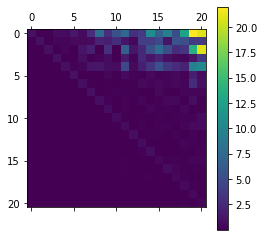

<ipython-input-28-32cbd30d37e5>:4: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.matshow(A_tilde, cmap=plt.cm.RdBu,norm=colors.SymLogNorm(linthresh=1.e-3, linscale=1.0,


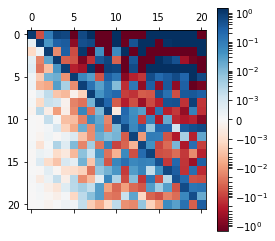

In [28]:
plt.matshow(np.absolute(A_tilde))#, cmap=plt.cm.RdBu)#, vmin=-100.0, vmax=100.0)
plt.colorbar()
plt.show()
plt.matshow(A_tilde, cmap=plt.cm.RdBu,norm=colors.SymLogNorm(linthresh=1.e-3, linscale=1.0,
                                              vmin=-1.5, vmax=1.5))
plt.colorbar()

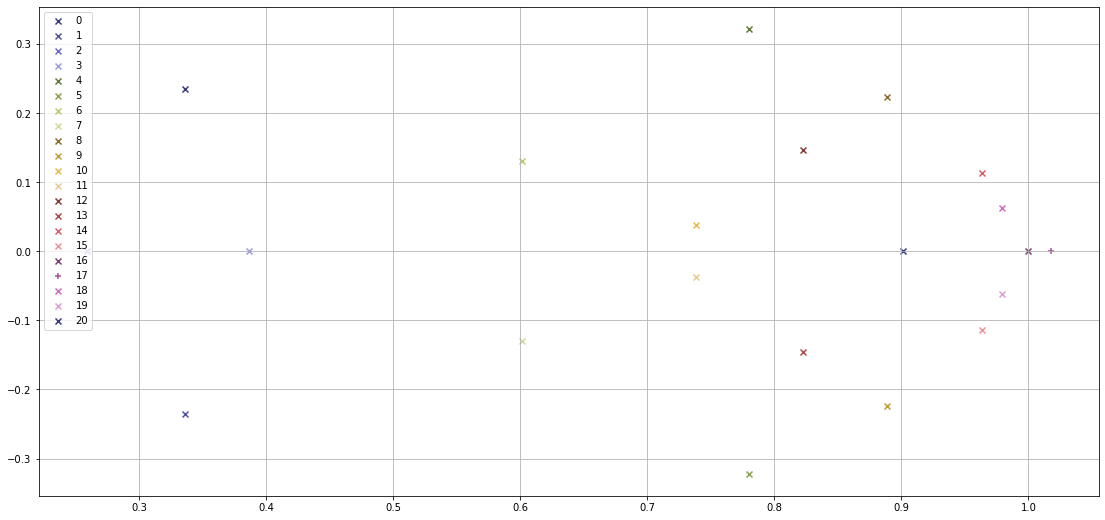

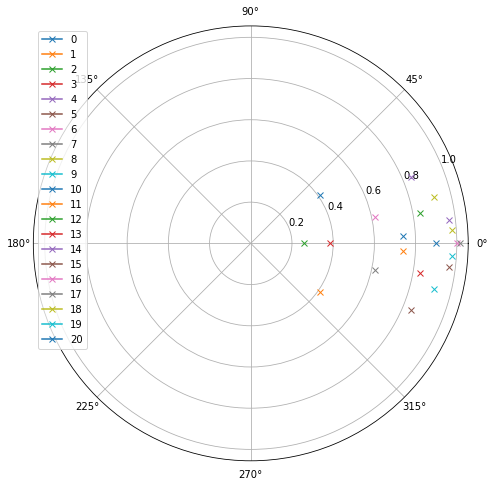

In [29]:
Lambda,W = np.linalg.eig(A_tilde)
colores = plt.cm.tab20b.colors
colores = colores + colores

fig = plt.figure(figsize=(19,9))
for i in range(len(Lambda)):
    if np.abs(Lambda[i]) >= 1:
        plt.scatter(Lambda[i].real,Lambda[i].imag,color=colores[i],label=i,marker='+')
    else:    
        plt.scatter(Lambda[i].real,Lambda[i].imag,color=colores[i],label=i,marker='x')
plt.legend(loc=2)
plt.grid()
plt.show()

#fig, ax = plt.subplots(figsize=(9, 9))
fig = plt.figure(figsize=(8,8))
j = 0
for i in Lambda:
    plt.polar([np.angle(i)],[np.abs(i)],marker='x',label=j)
    j+=1
plt.legend(loc=2)
plt.show()

In [30]:
X_interp = A.dot(Omega.loc[celdas])
puntos_int = X_interp.T.shift(1)
display(puntos.shift(-1).tail())
display(puntos_int.tail())

Día de la semana       Casos  test coresp  \
Fecha                                                   
2021-01-06               4.0  334.142857  1921.428571   
2021-01-07               4.0  410.000000  2301.000000   
2021-01-08               4.0  446.000000  2482.571429   
2021-01-09               4.0  453.142857  2531.714286   
2021-01-10               NaN         NaN          NaN   

            Nº de pacientes a los que se ha realizado pruebas  \
Fecha                                                           
2021-01-06                                        1933.071429   
2021-01-07                                        2343.785714   
2021-01-08                                        2309.500000   
2021-01-09                                        2292.785714   
2021-01-10                                                NaN   

            Tasa de positividad (%)  Asintomáticos    Zaragoza  1 a 14 años  \
Fecha                                                                         
2021-01-06                16.921429     164.488571  225.857143    23.571429   
2021-01-07                17.611429     204.281429  278.285714    31.571429   
2021-01-08                17.954286     225.588571  312.857143    37.714286   
2021-01-09                17.895714     230.305714  316.142857    36.571429   
2021-01-10                      NaN            NaN         NaN          NaN   

            15 a 24 años  25 a 34 años  ...           Día        Rs        Rd  \
Fecha                                   ...                                     
2021-01-06     43.285714     46.428571  ...  1.110223e-16  1.465065  1.123411   
2021-01-07     55.428571     54.857143  ...  1.110223e-16  1.462944  1.283413   
2021-01-08     59.000000     59.428571  ...  1.110223e-16  1.444423  1.183101   
2021-01-09     61.285714     62.000000  ...  1.110223e-16  1.418522  1.112299   
2021-01-10           NaN           NaN  ...           NaN       NaN       NaN   

            Bias   Festivo   Lectivo   Laboral  NoLaboral  NoLectivo  \
Fecha                                                                  
2021-01-06   1.0  0.285714  0.142857  0.428571   0.571429   0.857143   
2021-01-07   1.0  0.142857  0.285714  0.571429   0.428571   0.714286   
2021-01-08   1.0  0.142857  0.285714  0.571429   0.428571   0.714286   
2021-01-09   1.0  0.142857  0.285714  0.571429   0.428571   0.714286   
2021-01-10   NaN       NaN       NaN       NaN        NaN        NaN   

            Reuniones  
Fecha                  
2021-01-06        0.0  
2021-01-07        0.0  
2021-01-08        0.0  
2021-01-09        0.0  
2021-01-10        NaN  

[5 rows x 38 columns]

Casos  test coresp  Tasa de positividad (%)  \
Fecha                                                          
2021-01-06  329.554242  2086.714211                15.898317   
2021-01-07  354.959344  2062.589677                17.190245   
2021-01-08  354.593361  1959.382906                17.654133   
2021-01-09  381.828454  2142.523622                17.527673   
2021-01-10  454.765504  2561.291595                17.879697   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
Fecha                                                                          
2021-01-06                                        2034.977263     163.476900   
2021-01-07                                        1985.233338     178.334381   
2021-01-08                                        1943.838011     174.114275   
2021-01-09                                        2199.611010     190.197238   
2021-01-10                                        2425.159541     231.756435   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
Fecha                                                                  
2021-01-06          47.992357  242.271894     73.080442    24.782353   
2021-01-07          48.758561  257.042405     72.163190    24.708122   
2021-01-08          48.802877  251.159232     70.669134    23.587820   
2021-01-09          49.502279  261.404155     68.577160    27.413052   
2021-01-10          50.467753  311.762263     68.058920    36.760595   

            15 a 24 años  ...  55 a 64 años  65 a 74 años  75 años o más  \
Fecha                     ...                                              
2021-01-06     37.210289  ...     44.196144     24.225443      49.412466   
2021-01-07     42.663726  ...     48.082448     24.773388      53.304788   
2021-01-08     45.661470  ...     47.421805     24.204471      47.128981   
2021-01-09     51.329166  ...     49.884251     26.340145      45.498985   
2021-01-10     61.740043  ...     61.812691     32.253664      51.533125   

            Camas Ocup  Camas libres  Camas (%)  UCI ocupadas  \
Fecha                                                           
2021-01-06  363.436046   1712.022691  21.343680     46.219819   
2021-01-07  375.992297   1680.281052  22.754743     46.980286   
2021-01-08  393.006484   1635.449819  24.669256     47.556449   
2021-01-09  404.595304   1582.740262  26.230790     47.353468   
2021-01-10  410.169646   1551.822956  26.500584     46.977449   

            UCI libres con resp    UCI (%)        Rd  
Fecha                                                 
2021-01-06           106.379220  40.057976  1.141893  
2021-01-07           107.530593  40.797038  1.154831  
2021-01-08           107.533220  44.235409  1.169595  
2021-01-09           108.066254  45.592674  1.200707  
2021-01-10           110.279492  43.049141  1.172496  

[5 rows x 23 columns]

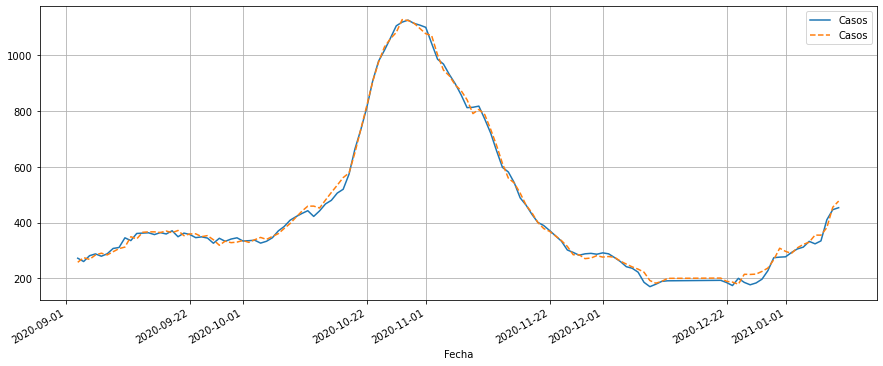

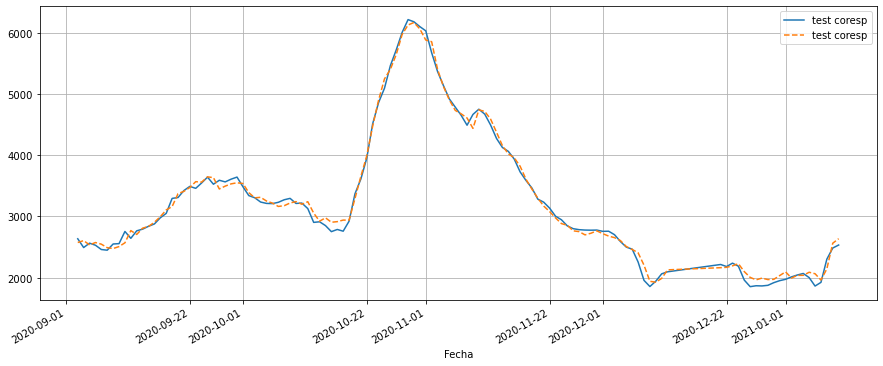

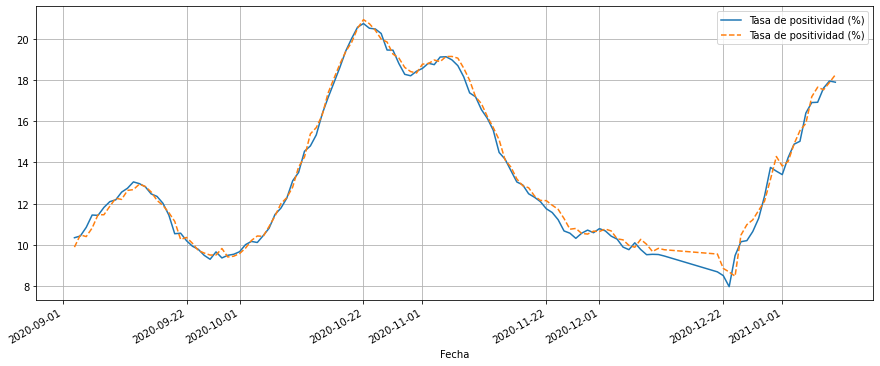

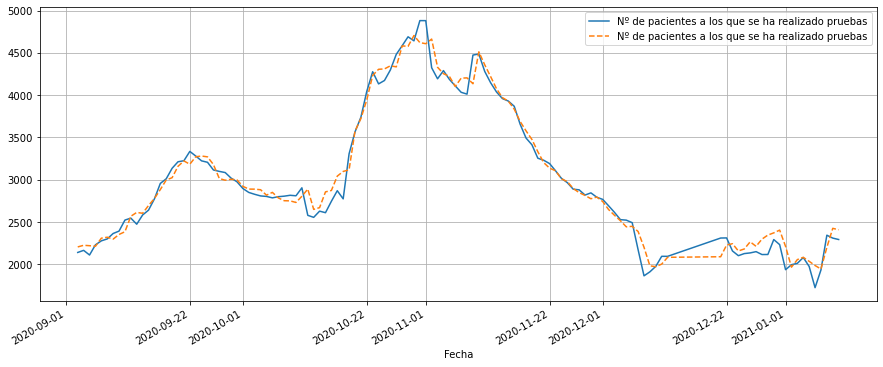

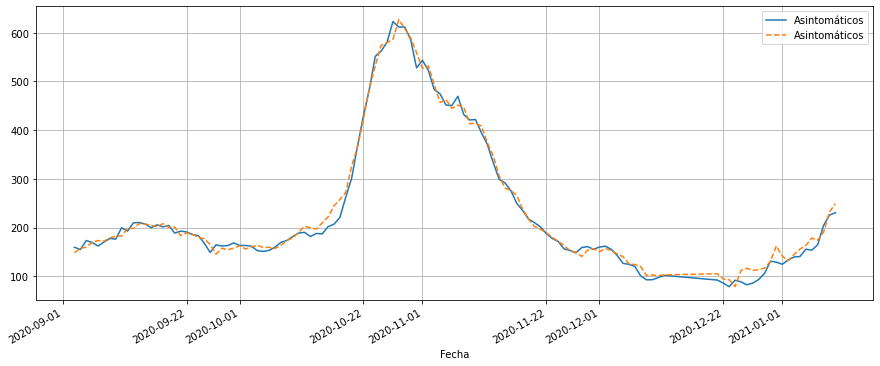

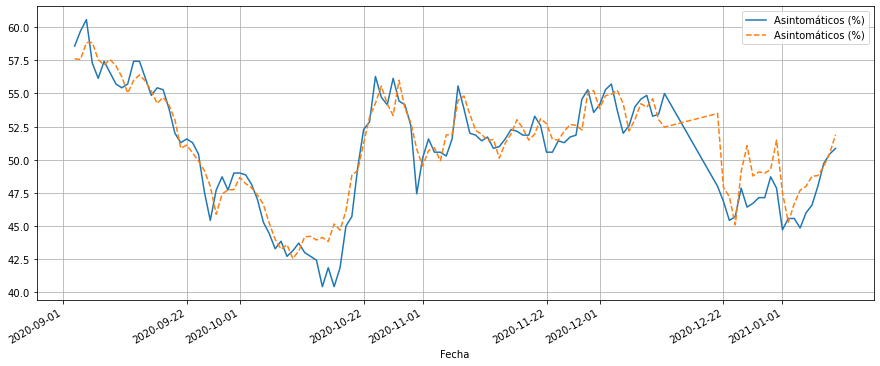

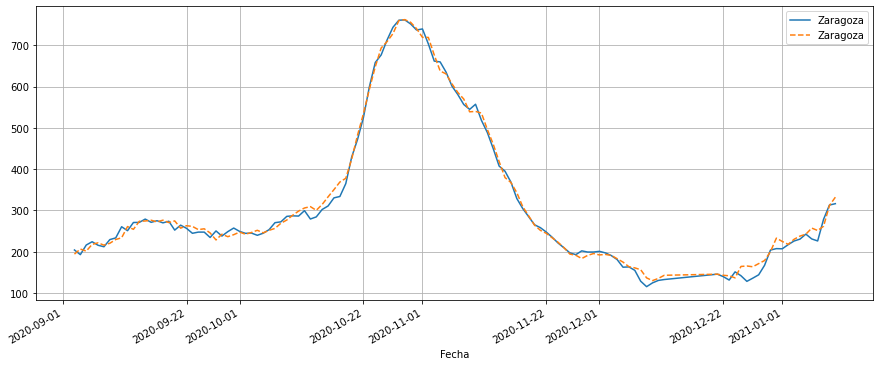

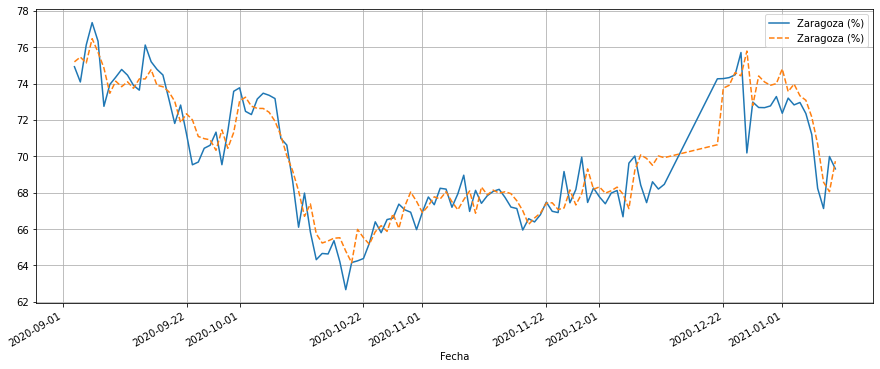

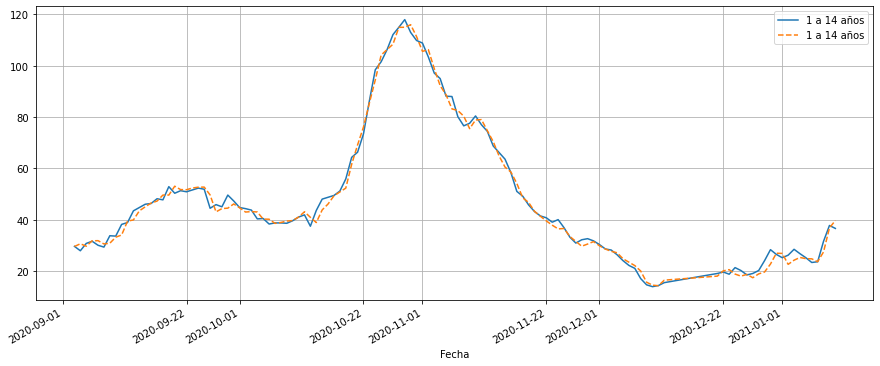

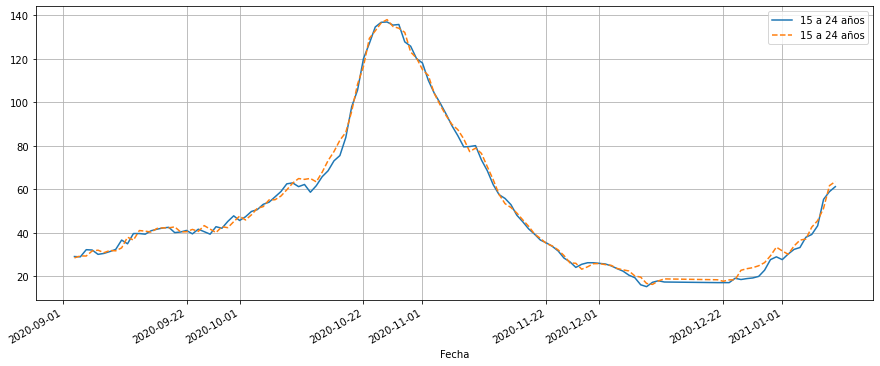

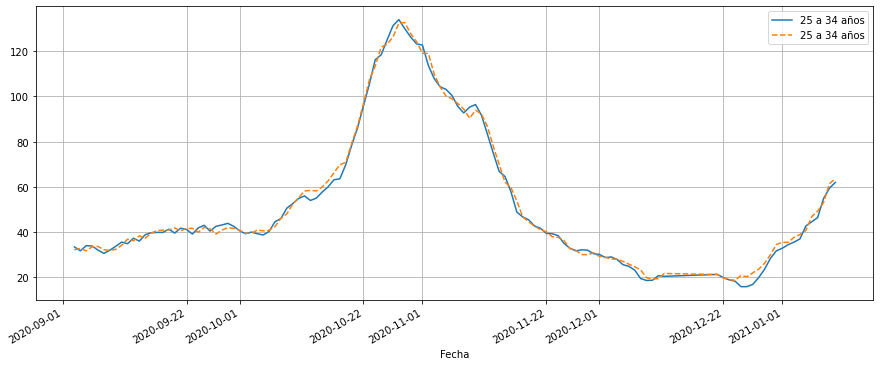

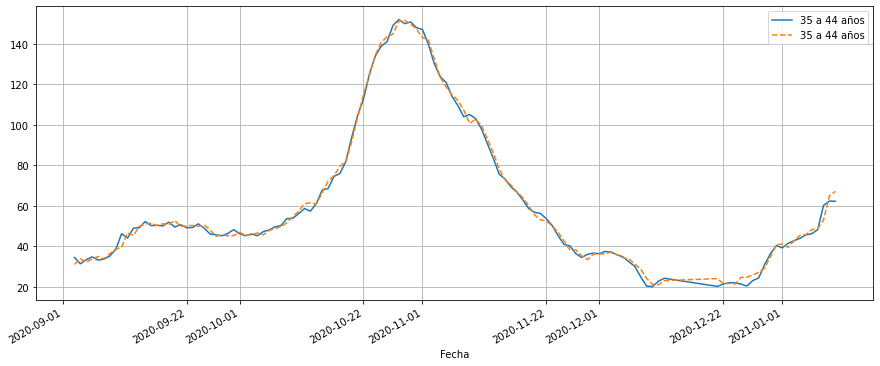

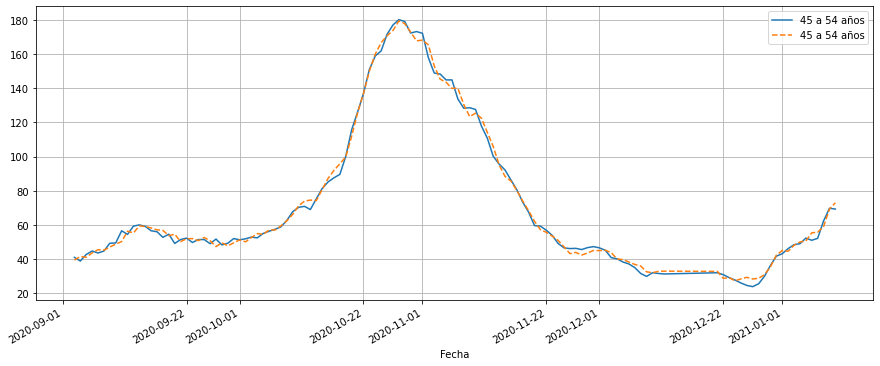

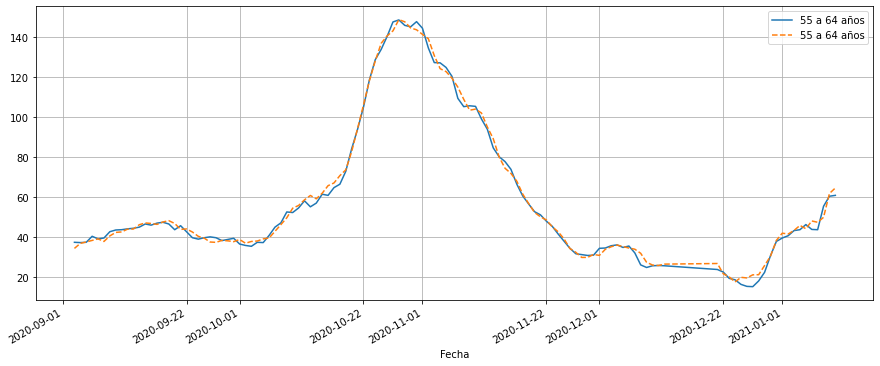

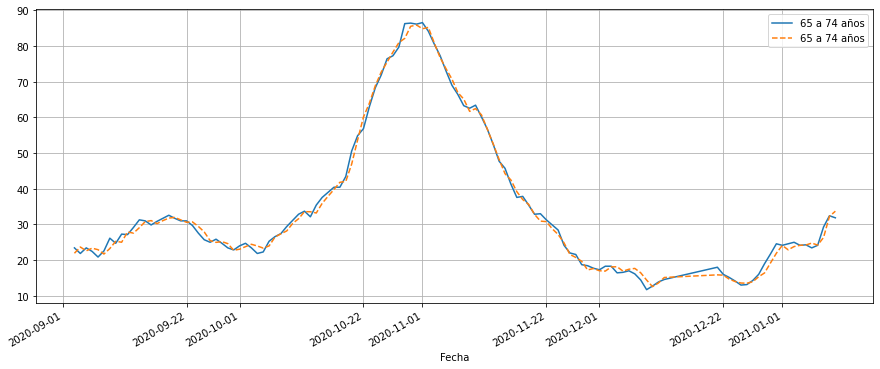

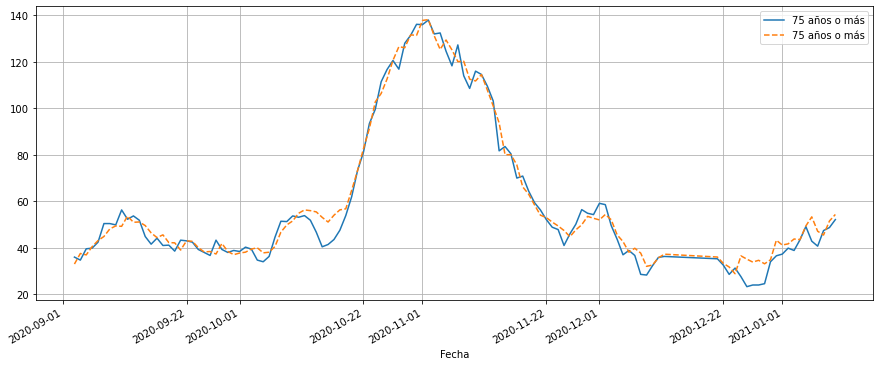

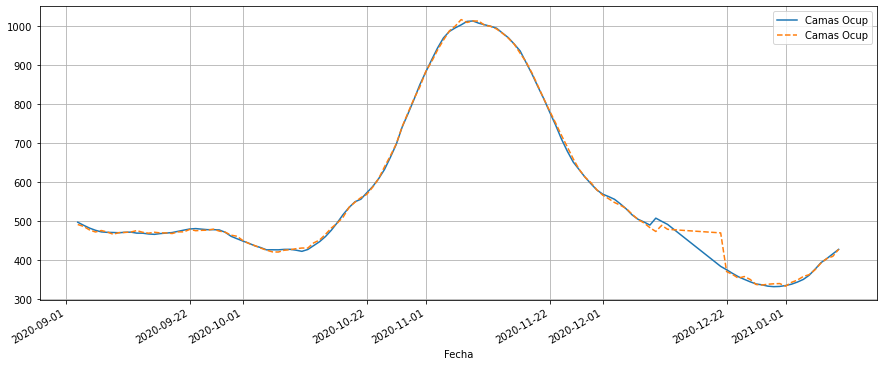

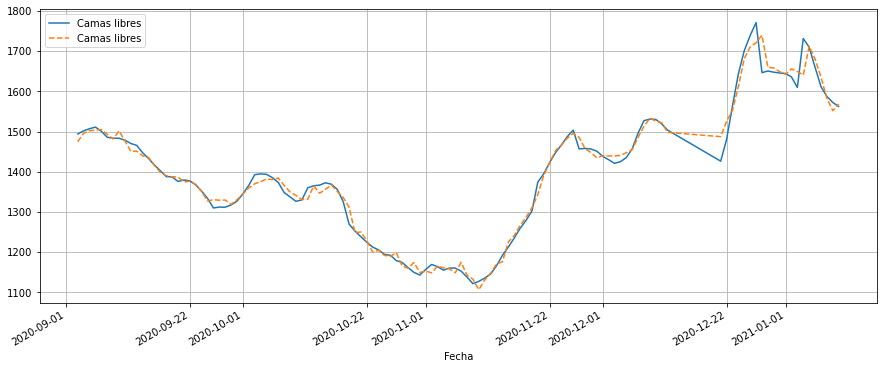

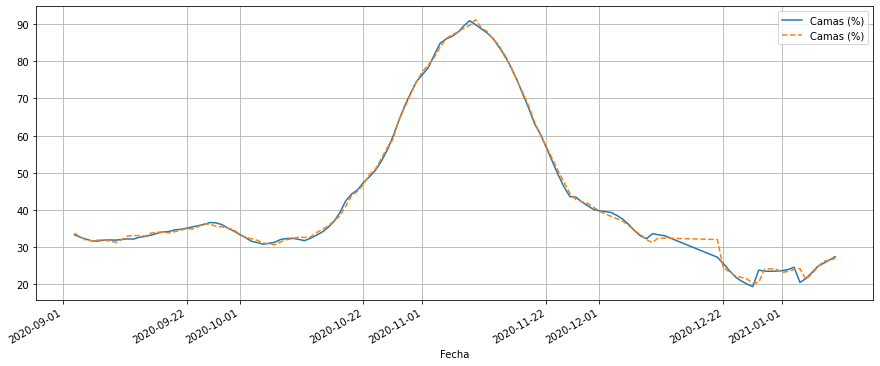

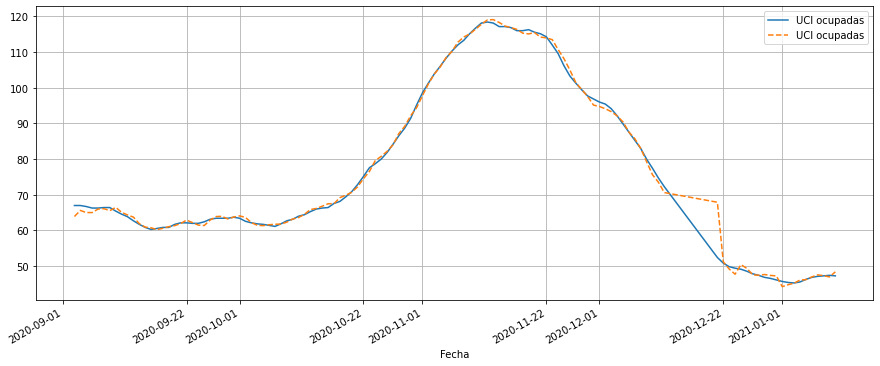

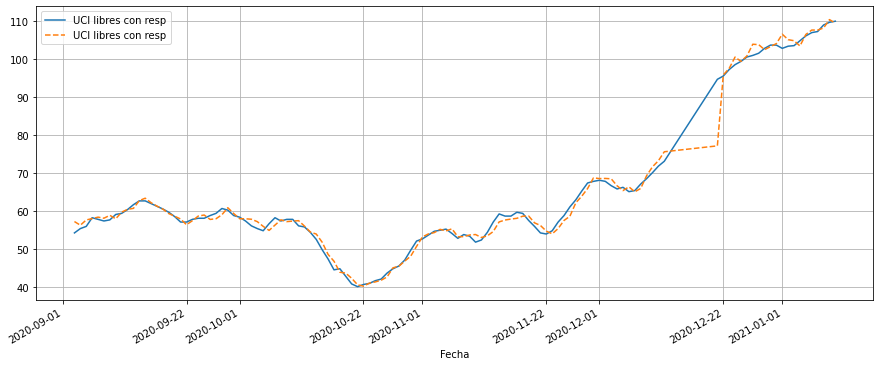

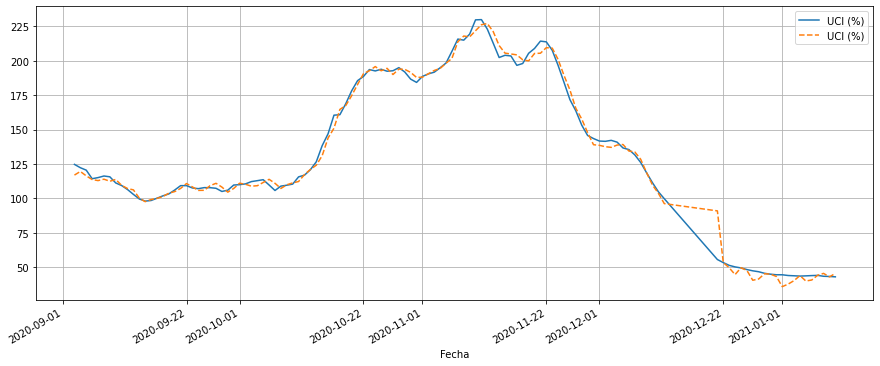

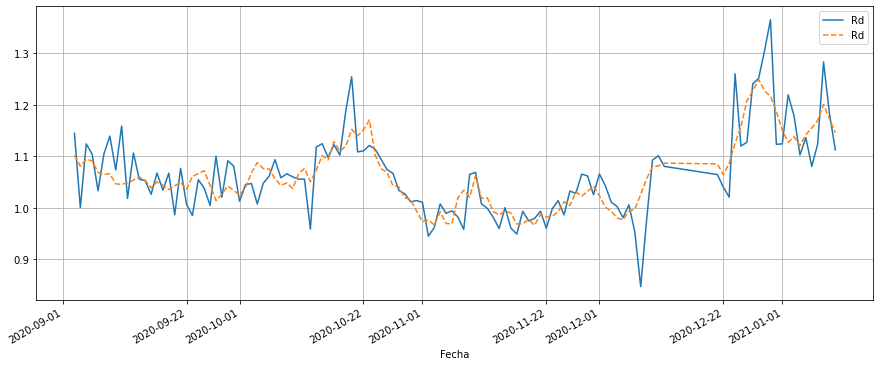

In [31]:
for i in variables:
    fig, ax = plt.subplots(figsize=(15,6))
    #Omega.T[[i]].plot(ax=ax,label='{} interpolado'.format(i))
    X_prima.T[[i]].plot(ls='-',ax=ax,label='{} interpolado'.format(i))
    X_interp.T[[i]].plot(ls='--',ax=ax,label='{} interpolado'.format(i))
    plt.grid()
    plt.legend()
    plt.show()

In [32]:
(X_interp-X_prima).divide(X_prima/100.).T.describe()

Casos  test coresp  Tasa de positividad (%)  \
count  122.000000   122.000000               122.000000   
mean     1.405461     0.738794                 0.879184   
std      5.132272     3.168300                 2.798042   
min    -10.547140    -6.887283               -10.573380   
25%     -1.447127    -1.294931                -0.638380   
50%      0.644381     0.351850                 0.799837   
75%      3.484309     2.391619                 2.281440   
max     20.968055    12.716265                 9.949660   

       Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
count                                         122.000000     122.000000   
mean                                            1.155935       2.934674   
std                                             4.401823       8.251137   
min                                            -9.582491     -14.126493   
25%                                            -1.275077      -1.683989   
50%                                             0.542591       1.054197   
75%                                             2.741449       5.745537   
max                                            18.151518      41.119978   

       Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  15 a 24 años  \
count         122.000000  122.000000    122.000000   122.000000    122.000000   
mean            1.093800    1.862698      0.366757    -0.843619      2.330616   
std             3.128508    6.154271      1.766437     5.880584      6.501862   
min            -4.990349  -10.259817     -4.878321   -19.833590     -9.774661   
25%            -1.039026   -1.230019     -0.814279    -3.004404     -1.485757   
50%             0.672262    0.770365      0.342275    -0.177501      1.334459   
75%             2.704879    3.817581      1.564744     2.541611      4.636696   
max            11.691926   29.069639      7.978092    17.429342     24.550607   

       ...  55 a 64 años  65 a 74 años  75 años o más  Camas Ocup  \
count  ...    122.000000    122.000000     122.000000  122.000000   
mean   ...      1.744034     -0.356347       4.173015    0.200098   
std    ...      6.639585      5.247931      11.466601    2.285654   
min    ...    -10.276439    -13.631454     -13.756327   -6.707866   
25%    ...     -1.843079     -3.389586      -2.613733   -0.507892   
50%    ...      0.631997     -0.443178       1.616026    0.011021   
75%    ...      3.467861      2.452709       8.079936    0.487705   
max    ...     38.630765     23.034951      50.823116   22.255769   

       Camas libres   Camas (%)  UCI ocupadas  UCI libres con resp  \
count    122.000000  122.000000    122.000000           122.000000   
mean       0.066672    0.221849      0.227979             0.131244   
std        1.302999    3.158595      2.922727             2.579536   
min       -5.245646  -13.860910     -4.595996           -18.523051   
25%       -0.483132   -1.006623     -0.580165            -1.072521   
50%       -0.025163    0.121729      0.029362             0.360487   
75%        0.587741    1.098515      0.766781             1.405336   
max        5.664511   18.155314     29.533949             5.524521   

          UCI (%)          Rd  
count  122.000000  122.000000  
mean    -0.427388    0.045239  
std      6.937346    4.393445  
min    -19.346254  -10.941795  
25%     -1.978579   -2.403862  
50%     -0.409357   -0.310081  
75%      1.086207    2.356002  
max     63.434001   21.233409  

[8 rows x 23 columns]

In [33]:
x1 = puntos[variables].T.iloc[:,-12]
display(x1)
display(puntos[variables].T.iloc[:,-11])
A.dot(x1)

Casos                                                 273.857143
test coresp                                          1916.571429
Tasa de positividad (%)                                13.760000
Nº de pacientes a los que se ha realizado pruebas    2292.142857
Asintomáticos                                         131.055714
Asintomáticos (%)                                      48.714286
Zaragoza                                              203.857143
Zaragoza (%)                                           72.770637
1 a 14 años                                            28.285714
15 a 24 años                                           27.714286
25 a 34 años                                           28.428571
35 a 44 años                                           36.428571
45 a 54 años                                           36.285714
55 a 64 años                                           30.714286
65 a 74 años                                           21.714286
75 años o más            

Casos                                                 275.857143
test coresp                                          1949.285714
Tasa de positividad (%)                                13.578571
Nº de pacientes a los que se ha realizado pruebas    2232.142857
Asintomáticos                                         128.838571
Asintomáticos (%)                                      47.857143
Zaragoza                                              207.285714
Zaragoza (%)                                           73.283573
1 a 14 años                                            26.428571
15 a 24 años                                           29.000000
25 a 34 años                                           31.714286
35 a 44 años                                           40.428571
45 a 54 años                                           41.714286
55 a 64 años                                           37.857143
65 a 74 años                                           24.571429
75 años o más            

Casos                                                 307.834186
test coresp                                          2032.223213
Tasa de positividad (%)                                14.289910
Nº de pacientes a los que se ha realizado pruebas    2404.093569
Asintomáticos                                         162.303279
Asintomáticos (%)                                      51.476812
Zaragoza                                              232.670564
Zaragoza (%)                                           73.996066
1 a 14 años                                            26.901410
15 a 24 años                                           33.457779
25 a 34 años                                           34.523751
35 a 44 años                                           40.782960
45 a 54 años                                           42.275107
55 a 64 años                                           38.383730
65 a 74 años                                           21.923150
75 años o más            

Alarma  Festivo  Reuniones  Lectivo
2020-10-07     0.0      0.0        0.0      1.0
2020-10-08     0.0      0.0        0.0      1.0
2020-10-09     0.0      0.0        0.0      1.0
2020-10-10     0.0      1.0        0.0      0.0
2020-10-11     0.0      1.0        0.0      0.0
...            ...      ...        ...      ...
2021-03-07     1.0      NaN        NaN      NaN
2021-03-08     1.0      NaN        NaN      NaN
2021-03-09     1.0      NaN        NaN      NaN
2021-03-10     1.0      NaN        NaN      NaN
2021-03-11     1.0      NaN        NaN      NaN

[148 rows x 4 columns]

Alarma   Festivo  NoLaboral   Laboral  NoLectivo   Lectivo  \
2020-10-13     0.0  0.428571   0.285714  0.714286   0.571429  0.428571   
2020-10-14     0.0  0.428571   0.285714  0.714286   0.714286  0.285714   
2020-10-15     0.0  0.428571   0.285714  0.714286   0.714286  0.285714   
2020-10-16     0.0  0.428571   0.285714  0.714286   0.714286  0.285714   
2020-10-17     0.0  0.285714   0.285714  0.714286   0.714286  0.285714   
...            ...       ...        ...       ...        ...       ...   
2021-03-07     2.0  0.000000   0.285714  0.714286   0.285714  0.714286   
2021-03-08     2.0  0.000000   0.285714  0.714286   0.285714  0.714286   
2021-03-09     2.0  0.000000   0.285714  0.714286   0.285714  0.714286   
2021-03-10     2.0  0.000000   0.285714  0.714286   0.285714  0.714286   
2021-03-11     2.0  0.000000   0.285714  0.714286   0.285714  0.714286   

            Reuniones  Bias  
2020-10-13        2.0   1.0  
2020-10-14        2.0   1.0  
2020-10-15        2.0   1.0  
2020-10-16        2.0   1.0  
2020-10-17        2.0   1.0  
...               ...   ...  
2021-03-07        0.0   1.0  
2021-03-08        0.0   1.0  
2021-03-09        0.0   1.0  
2021-03-10        0.0   1.0  
2021-03-11        0.0   1.0  

[142 rows x 8 columns]

Alarma   Festivo  NoLaboral   Laboral  NoLectivo   Lectivo  \
2020-10-13     0.0  0.428571   0.285714  0.714286   0.571429  0.428571   
2020-10-14     0.0  0.428571   0.285714  0.714286   0.714286  0.285714   
2020-10-15     0.0  0.428571   0.285714  0.714286   0.714286  0.285714   
2020-10-16     0.0  0.428571   0.285714  0.714286   0.714286  0.285714   
2020-10-17     0.0  0.285714   0.285714  0.714286   0.714286  0.285714   
...            ...       ...        ...       ...        ...       ...   
2021-03-07     1.0  0.000000   0.285714  0.714286   0.285714  0.714286   
2021-03-08     1.0  0.000000   0.285714  0.714286   0.285714  0.714286   
2021-03-09     1.0  0.000000   0.285714  0.714286   0.285714  0.714286   
2021-03-10     1.0  0.000000   0.285714  0.714286   0.285714  0.714286   
2021-03-11     1.0  0.000000   0.285714  0.714286   0.285714  0.714286   

            Reuniones  Bias  
2020-10-13        2.0   1.0  
2020-10-14        2.0   1.0  
2020-10-15        2.0   1.0  
2020-10-16        2.0   1.0  
2020-10-17        2.0   1.0  
...               ...   ...  
2021-03-07        0.0   1.0  
2021-03-08        0.0   1.0  
2021-03-09        0.0   1.0  
2021-03-10        0.0   1.0  
2021-03-11        0.0   1.0  

[142 rows x 8 columns]

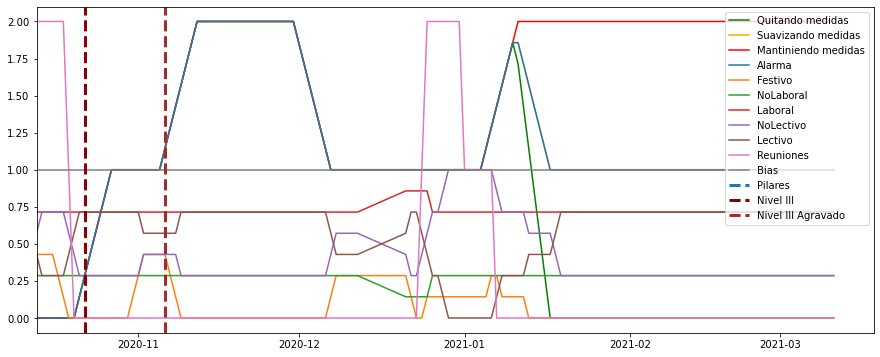

In [34]:
#x1 = puntos.loc[pd.date_range('2020-9-07',periods=83,freq='d')].copy()
x1 = puntos.loc['2020-10-21':].copy() #goto0
x1 = puntos.loc['2020-10-7':].copy() #goto0
#x1 = puntos.loc['2020-9-1':].copy() #goto0
#x1 = puntos.loc['2020-11-1':].copy()
#x1 = puntos.iloc[-60:].copy()
#x1 = puntos.iloc[-8:].copy()
U1 = x1[entradas]
U1 = total.loc[x1.index,['Alarma']]
U0 = pd.concat([U1,
    pd.DataFrame(np.ones(60)*0,index=pd.date_range(U1.index[-1]+pd.offsets.DateOffset(1),
                                   U1.index[-1]+pd.offsets.DateOffset(60)
                                  ),columns=['Alarma'])])
                                                   
U2 = pd.concat([U1,
    pd.DataFrame(np.ones(60)*2,index=pd.date_range(U1.index[-1]+pd.offsets.DateOffset(1),
                                   U1.index[-1]+pd.offsets.DateOffset(60)
                                  ),columns=['Alarma'])])
x1_0 = x1.iloc[7].copy()
U1 = pd.concat([U1,
    pd.DataFrame(np.ones(60)*1,index=pd.date_range(U1.index[-1]+pd.offsets.DateOffset(1),
                                   U1.index[-1]+pd.offsets.DateOffset(60)
                                  ),columns=['Alarma'])])
#U0.loc['2020-12-24':,'Alarma'] = 0
#U1.loc['2020-12-24':,'Alarma'] = 0
#U2.loc['2020-12-24':,'Alarma'] = 0
#
#U0.loc['2020-12-5':'2020-12-9','Alarma'] = 0
#U1.loc['2020-12-5':'2020-12-9','Alarma'] = 0
#U2.loc['2020-12-5':'2020-12-9','Alarma'] = 0



#U1.Alarma = total.Alarma
#U0.Alarma = total.Alarma
#U2.Alarma = total.Alarma

#U1 = Al1.copy()
U1['Festivo'] = total['Festivo']
U0['Festivo'] = total['Festivo']
U2['Festivo'] = total['Festivo']

U1['Reuniones'] = total['Reuniones']
U0['Reuniones'] = total['Reuniones']
U2['Reuniones'] = total['Reuniones']

U1['Lectivo']   = total['Lectivo']

display(U1)

U1.Festivo.fillna(0,inplace=True)
U0.Festivo.fillna(0,inplace=True)
U2.Festivo.fillna(0,inplace=True)
U1.Reuniones.fillna(0,inplace=True)
U0.Reuniones.fillna(0,inplace=True)
U2.Reuniones.fillna(0,inplace=True)

U1.loc[:,'Laboral'] = 1 #- total.Festivo/7
U1.loc[U1[[(x.weekday()+1 > 5) for x in U1.index]].index,
       'Laboral' ] =0
U0['Laboral'] = U1.Laboral
U2['Laboral'] = U1.Laboral

U1.Lectivo.fillna(1,inplace=True)
U1.loc[U1[[(x.weekday()+1 > 5) for x in U1.index]].index,
       'Lectivo' ] =0
U0['Lectivo'] = U1.Lectivo
U2['Lectivo'] = U1.Lectivo

U1.loc[:,'NoLectivo'] = 1-U1.Lectivo
U0.loc[:,'NoLectivo'] = U1.NoLectivo
U2.loc[:,'NoLectivo'] = U1.NoLectivo

U1.loc[:,'NoLaboral'] = 1-U1.Laboral
U0.loc[:,'NoLaboral'] = U1.NoLaboral
U2.loc[:,'NoLaboral'] = U1.NoLaboral

U0['Bias'] = 1
U1['Bias'] = 1
U2['Bias'] = 1


U0 = U0.rolling(7,center=False).mean().copy().dropna()
U1 = U1.rolling(7,center=False).mean().copy().dropna()
U2 = U2.rolling(7,center=False).mean().copy().dropna()

fig, ax = plt.subplots(figsize=(15,6))
#highlight_datetimes(pd.concat([diario.loc['2020-9-7':],U1]).index.unique(), ax,items=False)

plt.plot(U0.index,U0.Alarma,axes=ax,c='green',label='Quitando medidas')
plt.plot(U1.index,U1.Alarma,axes=ax,c='orange',label='Suavizando medidas')
plt.plot(U2.index,U2.Alarma,axes=ax,c='r',label='Mantiniendo medidas')
for i in entradas:
    plt.plot(U1.index,U1[i],axes=ax,label=i)
    
ax.axvline(pd.Timestamp('2020-10-12'),lw=3,ls='--',label='Pilares')
ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
plt.legend()
plt.xlim(left=U0.index[0])

display(U2[entradas],U1[entradas])

In [36]:
import control as ct

#C = np.identity(len(A_tilde.columns))
C = U_hat_r.loc[celdas]
D = np.zeros((len(A_tilde.columns),len(B_tilde.columns)))

In [37]:
fsys_A_tilde = ct.ss(A_tilde,B_tilde,C,np.zeros((len(C.index),len(B_tilde.columns))),1)

In [38]:
np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0])),x1[entradas].T.values
np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0,0,1]))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [39]:
%time
Ukk = U1.copy()
Ukk.Alarma=0
t,y,x = ct.forced_response(fsys_A_tilde,T=range(len(Ukk.index)),   
                         #return_x=True,
                         #U=np.transpose(np.einsum('i,j->ij',np.ones(len(U1.index)),[0,0])),#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         U=Ukk[entradas].T, 
                         #U=x1[[entradas]].T,#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         #interpolate=True,
                         #transpose=True,
                         X0=U_hat_r.loc[celdas].T.dot(x1_0[celdas]))
noAction = pd.DataFrame(U_hat_r.loc[celdas].dot(x).values,index=celdas,columns=U1.index)
display(noAction.T)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


Casos  test coresp  Tasa de positividad (%)  \
2020-10-13  441.705216  2911.426432                14.981656   
2020-10-14  459.352477  2895.589946                15.634173   
2020-10-15  480.387406  2882.070784                16.349135   
2020-10-16  507.820722  2900.178288                17.065950   
2020-10-17  541.917532  2960.025580                17.753298   
...                ...          ...                      ...   
2021-03-07  698.204311  4697.568017                13.808971   
2021-03-08  702.825592  4719.831806                13.830168   
2021-03-09  707.471056  4742.752827                13.849761   
2021-03-10  712.129938  4766.258962                13.867632   
2021-03-11  716.793209  4790.278278                13.883714   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2020-10-13                                        2628.428858     187.855745   
2020-10-14                                        2721.511285     187.610778   
2020-10-15                                        2809.193460     197.669216   
2020-10-16                                        2910.117486     215.099046   
2020-10-17                                        3028.909776     237.954063   
...                                                       ...            ...   
2021-03-07                                        4673.527960     357.648380   
2021-03-08                                        4696.869496     359.891164   
2021-03-09                                        4721.005863     362.133533   
2021-03-10                                        4745.864156     364.370520   
2021-03-11                                        4771.372908     366.598061   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
2020-10-13          42.444323  284.136565     64.353329    43.617071   
2020-10-14          41.289643  294.769866     63.994379    46.048260   
2020-10-15          41.304793  307.894028     63.757221    47.964379   
2020-10-16          41.808927  325.679474     63.656972    50.468391   
2020-10-17          42.501585  348.183562     63.616180    53.852106   
...                       ...         ...           ...          ...   
2021-03-07          52.447552  466.795337     68.895665    82.094053   
2021-03-08          52.349619  469.897543     68.831341    82.720956   
2021-03-09          52.247401  472.996724     68.760615    83.356999   
2021-03-10          52.141324  476.085165     68.683554    84.000480   
2021-03-11          52.031822  479.156486     68.600261    84.649820   

            15 a 24 años  ...  55 a 64 años  65 a 74 años  75 años o más  \
2020-10-13     61.753540  ...     57.004521     35.424198      46.750122   
2020-10-14     63.876127  ...     59.088140     36.930744      45.289363   
2020-10-15     67.229557  ...     61.258848     38.526152      45.863623   
2020-10-16     71.746817  ...     64.329673     40.506719      47.449928   
2020-10-17     77.150551  ...     68.489396     42.919335      49.674657   
...                  ...  ...           ...           ...            ...   
2021-03-07     79.303035  ...     92.231304     56.597148      94.656870   
2021-03-08     79.843832  ...     92.849026     57.026260      95.212044   
2021-03-09     80.392004  ...     93.466035     57.456364      95.764305   
2021-03-10     80.946288  ...     94.081172     57.886372      96.312991   
2021-03-11     81.505533  ...     94.693561     58.315384      96.857742   

            Camas Ocup  Camas libres  Camas (%)  UCI ocupadas  \
2020-10-13  447.714565   1366.716040  33.206532     66.007440   
2020-10-14  462.574973   1350.528047  34.887762     65.950365   
2020-10-15  477.662139   1338.755926  36.404519     66.258346   
2020-10-16  491.477873   1326.836973  37.834823     66.763176   
2020-10-17  504.257949   1315.115203  39.213708     67.454580   
...                ...           ...        ...           ...   
2021-03-07  870.177266    921.603705  80.199968    133

In [40]:
%%time 
t,y,x = ct.forced_response(fsys_A_tilde,T=range(len(U1.index)),   
                         #return_x=True,
                         #U=np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0])),#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         U=U1[entradas].T,#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         #interpolate=True,
                         #transpose=True,
                         X0=U_hat_r.loc[celdas].T.dot(x1_0[celdas]))


kControl = pd.DataFrame(U_hat_r.loc[celdas].dot(x).values,index=celdas,columns=U1.index)
display(kControl.T)


t,y,x = ct.forced_response(fsys_A_tilde,T=range(len(U1.index)),   
                         #return_x=True,
                         #U=np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0])),#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         U=U0[entradas].T,#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         #interpolate=True,
                         #transpose=True,
                         X0=U_hat_r.loc[celdas].T.dot(x1_0[celdas]))


rellaxed = pd.DataFrame(U_hat_r.loc[celdas].dot(x).values,index=celdas,columns=U1.index)
display(rellaxed.T)


t,y,x = ct.forced_response(fsys_A_tilde,T=range(len(U1.index)),   
                         #return_x=True,
                         #U=np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0])),#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         U=U2[entradas].T,#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         #interpolate=True,
                         #transpose=True,
                         X0=U_hat_r.loc[celdas].T.dot(x1_0[celdas]))


hard = pd.DataFrame(U_hat_r.loc[celdas].dot(x).values,index=celdas,columns=U1.index)
display(hard.T)

Casos  test coresp  Tasa de positividad (%)  \
2020-10-13  441.705216  2911.426432                14.981656   
2020-10-14  459.352477  2895.589946                15.634173   
2020-10-15  480.387406  2882.070784                16.349135   
2020-10-16  507.820722  2900.178288                17.065950   
2020-10-17  541.917532  2960.025580                17.753298   
...                ...          ...                      ...   
2021-03-07  205.385636  1851.509015                12.139019   
2021-03-08  201.908374  1828.919532                12.158186   
2021-03-09  198.309417  1806.186046                12.175921   
2021-03-10  194.578071  1783.227093                12.192145   
2021-03-11  190.705796  1759.964542                12.206826   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2020-10-13                                        2628.428858     187.855745   
2020-10-14                                        2721.511285     187.610778   
2020-10-15                                        2809.193460     197.669216   
2020-10-16                                        2910.117486     215.099046   
2020-10-17                                        3028.909776     237.954063   
...                                                       ...            ...   
2021-03-07                                        1391.453214     110.874973   
2021-03-08                                        1359.591431     109.079830   
2021-03-09                                        1327.563617     107.209643   
2021-03-10                                        1295.284326     105.260139   
2021-03-11                                        1262.670595     103.228132   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
2020-10-13          42.444323  284.136565     64.353329    43.617071   
2020-10-14          41.289643  294.769866     63.994379    46.048260   
2020-10-15          41.304793  307.894028     63.757221    47.964379   
2020-10-16          41.808927  325.679474     63.656972    50.468391   
2020-10-17          42.501585  348.183562     63.616180    53.852106   
...                       ...         ...           ...          ...   
2021-03-07          51.641874  158.267808     70.739276    11.004377   
2021-03-08          51.636469  156.369210     70.843119    10.432341   
2021-03-09          51.629097  154.375728     70.944393     9.847326   
2021-03-10          51.620297  152.279857     71.043249     9.247503   
2021-03-11          51.610613  150.075736     71.139873     8.631213   

            15 a 24 años  ...  55 a 64 años  65 a 74 años  75 años o más  \
2020-10-13     61.753540  ...     57.004521     35.424198      46.750122   
2020-10-14     63.876127  ...     59.088140     36.930744      45.289363   
2020-10-15     67.229557  ...     61.258848     38.526152      45.863623   
2020-10-16     71.746817  ...     64.329673     40.506719      47.449928   
2020-10-17     77.150551  ...     68.489396     42.919335      49.674657   
...                  ...  ...           ...           ...            ...   
2021-03-07     21.411920  ...     25.847405     12.023155      32.194403   
2021-03-08     21.031227  ...     25.366347     11.701626      31.673929   
2021-03-09     20.642274  ...     24.864888     11.367329      31.131339   
2021-03-10     20.243885  ...     24.341888     11.019124      30.565812   
2021-03-11     19.835018  ...     23.796542     10.656095      29.976890   

            Camas Ocup  Camas libres  Camas (%)  UCI ocupadas  \
2020-10-13  447.714565   1366.716040  33.206532     66.007440   
2020-10-14  462.574973   1350.528047  34.887762     65.950365   
2020-10-15  477.662139   1338.755926  36.404519     66.258346   
2020-10-16  491.477873   1326.836973  37.834823     66.763176   
2020-10-17  504.257949   1315.115203  39.213708     67.454580   
...                ...           ...        ...           ...   
2021-03-07  319.975384   1784.358635  12.043160     33

Casos  test coresp  Tasa de positividad (%)  \
2020-10-13  441.705216  2911.426432                14.981656   
2020-10-14  459.352477  2895.589946                15.634173   
2020-10-15  480.387406  2882.070784                16.349135   
2020-10-16  507.820722  2900.178288                17.065950   
2020-10-17  541.917532  2960.025580                17.753298   
...                ...          ...                      ...   
2021-03-07  311.599410  2475.455386                13.066139   
2021-03-08  309.757214  2463.757994                13.089061   
2021-03-09  307.826256  2452.004272                13.110824   
2021-03-10  305.800590  2440.136602                13.131378   
2021-03-11  303.676245  2428.101360                13.150712   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2020-10-13                                        2628.428858     187.855745   
2020-10-14                                        2721.511285     187.610778   
2020-10-15                                        2809.193460     197.669216   
2020-10-16                                        2910.117486     215.099046   
2020-10-17                                        3028.909776     237.954063   
...                                                       ...            ...   
2021-03-07                                        2000.618942     165.359500   
2021-03-08                                        1982.210043     164.374164   
2021-03-09                                        1963.763418     163.330983   
2021-03-10                                        1945.213362     162.228455   
2021-03-11                                        1926.496354     161.065991   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
2020-10-13          42.444323  284.136565     64.353329    43.617071   
2020-10-14          41.289643  294.769866     63.994379    46.048260   
2020-10-15          41.304793  307.894028     63.757221    47.964379   
2020-10-16          41.808927  325.679474     63.656972    50.468391   
2020-10-17          42.501585  348.183562     63.616180    53.852106   
...                       ...         ...           ...          ...   
2021-03-07          53.741390  225.967042     72.226681    25.330420   
2021-03-08          53.759321  225.072491     72.350191    25.013865   
2021-03-09          53.774865  224.104601     72.470620    24.688062   
2021-03-10          53.788544  223.059102     72.588088    24.351795   
2021-03-11          53.800879  221.933244     72.702748    24.004011   

            15 a 24 años  ...  55 a 64 años  65 a 74 años  75 años o más  \
2020-10-13     61.753540  ...     57.004521     35.424198      46.750122   
2020-10-14     63.876127  ...     59.088140     36.930744      45.289363   
2020-10-15     67.229557  ...     61.258848     38.526152      45.863623   
2020-10-16     71.746817  ...     64.329673     40.506719      47.449928   
2020-10-17     77.150551  ...     68.489396     42.919335      49.674657   
...                  ...  ...           ...           ...            ...   
2021-03-07     35.099481  ...     40.069122     21.058612      43.354853   
2021-03-08     34.904265  ...     39.807675     20.889007      43.062866   
2021-03-09     34.705141  ...     39.530798     20.709629      42.753178   
2021-03-10     34.501480  ...     39.237937     20.519727      42.425376   
2021-03-11     34.292736  ...     38.928841     20.318758      42.079413   

            Camas Ocup  Camas libres  Camas (%)  UCI ocupadas  \
2020-10-13  447.714565   1366.716040  33.206532     66.007440   
2020-10-14  462.574973   1350.528047  34.887762     65.950365   
2020-10-15  477.662139   1338.755926  36.404519     66.258346   
2020-10-16  491.477873   1326.836973  37.834823     66.763176   
2020-10-17  504.257949   1315.115203  39.213708     67.454580   
...                ...           ...        ...           ...   
2021-03-07  420.030913   1698.294267  22.883037     49

Casos  test coresp  Tasa de positividad (%)  \
2020-10-13  441.705216  2911.426432                14.981656   
2020-10-14  459.352477  2895.589946                15.634173   
2020-10-15  480.387406  2882.070784                16.349135   
2020-10-16  507.820722  2900.178288                17.065950   
2020-10-17  541.917532  2960.025580                17.753298   
...                ...          ...                      ...   
2021-03-07   99.171862  1227.562644                11.211900   
2021-03-08   94.059534  1194.081071                11.227312   
2021-03-09   88.792578  1160.367820                11.241018   
2021-03-10   83.355552  1126.317584                11.252911   
2021-03-11   77.735347  1091.827723                11.262941   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2020-10-13                                        2628.428858     187.855745   
2020-10-14                                        2721.511285     187.610778   
2020-10-15                                        2809.193460     197.669216   
2020-10-16                                        2910.117486     215.099046   
2020-10-17                                        3028.909776     237.954063   
...                                                       ...            ...   
2021-03-07                                         782.287486      56.390447   
2021-03-08                                         736.972819      53.785496   
2021-03-09                                         691.363816      51.088303   
2021-03-10                                         645.355290      48.291823   
2021-03-11                                         598.844836      45.390273   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
2020-10-13          42.444323  284.136565     64.353329    43.617071   
2020-10-14          41.289643  294.769866     63.994379    46.048260   
2020-10-15          41.304793  307.894028     63.757221    47.964379   
2020-10-16          41.808927  325.679474     63.656972    50.468391   
2020-10-17          42.501585  348.183562     63.616180    53.852106   
...                       ...         ...           ...          ...   
2021-03-07          49.542358   90.568574     69.251870    -3.321667   
2021-03-08          49.513617   87.665929     69.336046    -4.149184   
2021-03-09          49.483329   84.646855     69.418166    -4.993409   
2021-03-10          49.452050   81.500612     69.498409    -5.856789   
2021-03-11          49.420346   78.218229     69.576998    -6.741584   

            15 a 24 años  ...  55 a 64 años  65 a 74 años  75 años o más  \
2020-10-13     61.753540  ...     57.004521     35.424198      46.750122   
2020-10-14     63.876127  ...     59.088140     36.930744      45.289363   
2020-10-15     67.229557  ...     61.258848     38.526152      45.863623   
2020-10-16     71.746817  ...     64.329673     40.506719      47.449928   
2020-10-17     77.150551  ...     68.489396     42.919335      49.674657   
...                  ...  ...           ...           ...            ...   
2021-03-07      7.724358  ...     11.625689      2.987698      21.033954   
2021-03-08      7.158189  ...     10.925020      2.514245      20.284993   
2021-03-09      6.579406  ...     10.198977      2.025029      19.509500   
2021-03-10      5.986290  ...      9.445839      1.518521      18.706248   
2021-03-11      5.377300  ...      8.664243      0.993431      17.874366   

            Camas Ocup  Camas libres  Camas (%)  UCI ocupadas  \
2020-10-13  447.714565   1366.716040  33.206532     66.007440   
2020-10-14  462.574973   1350.528047  34.887762     65.950365   
2020-10-15  477.662139   1338.755926  36.404519     66.258346   
2020-10-16  491.477873   1326.836973  37.834823     66.763176   
2020-10-17  504.257949   1315.115203  39.213708     67.454580   
...                ...           ...        ...           ...   
2021-03-07  219.919854   1870.423002   1.203283     18

CPU times: user 179 ms, sys: 8.29 ms, total: 187 ms
Wall time: 173 ms


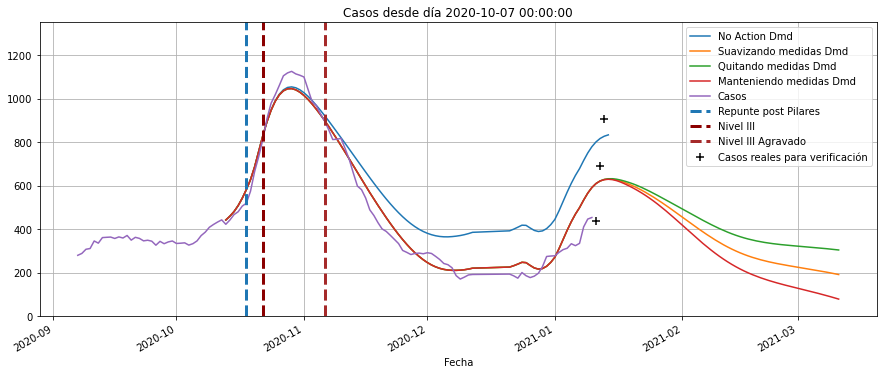

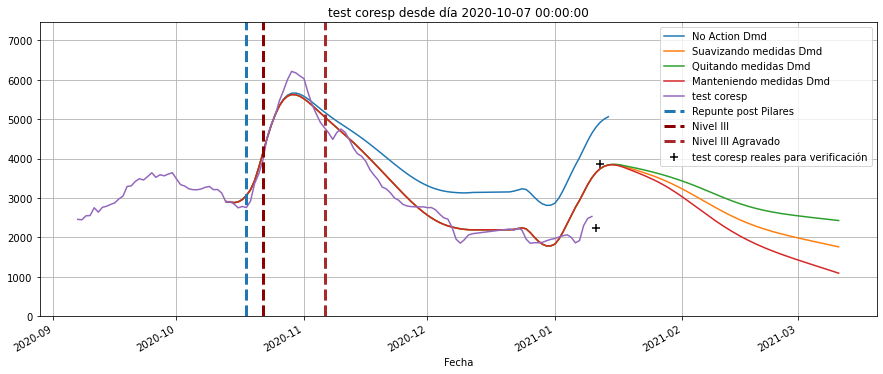

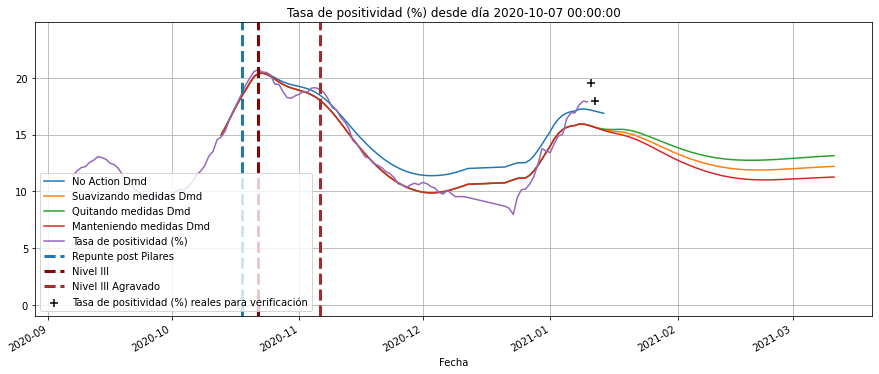

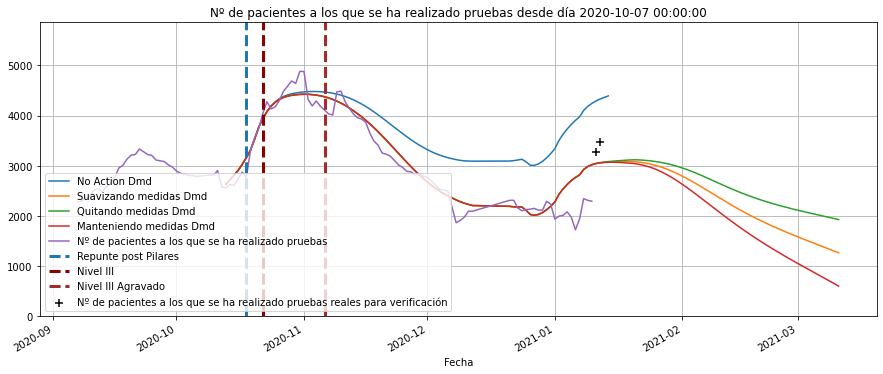

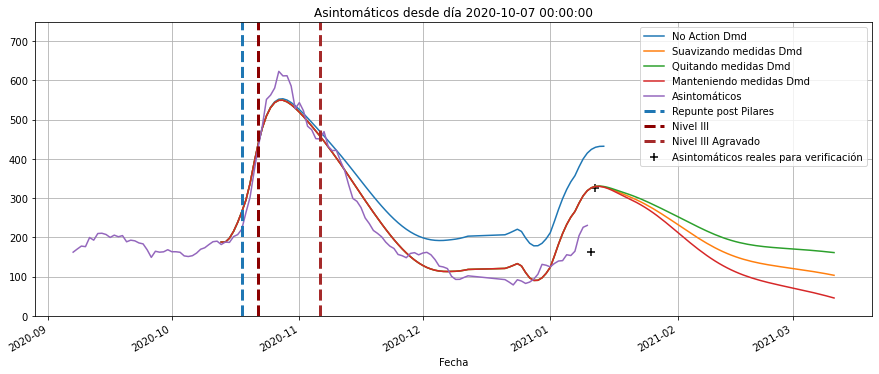

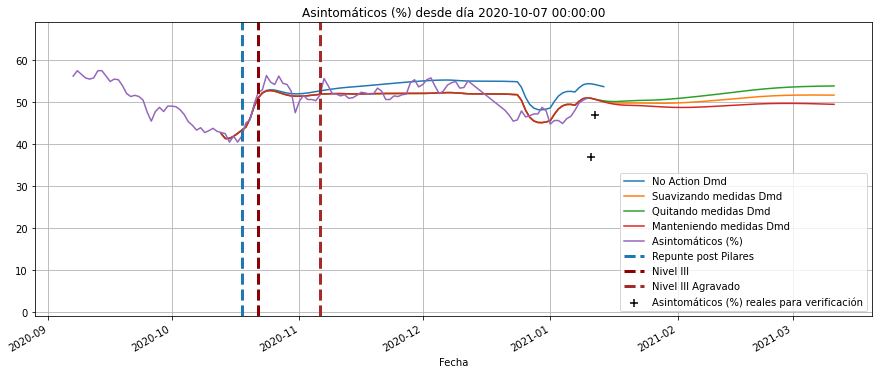

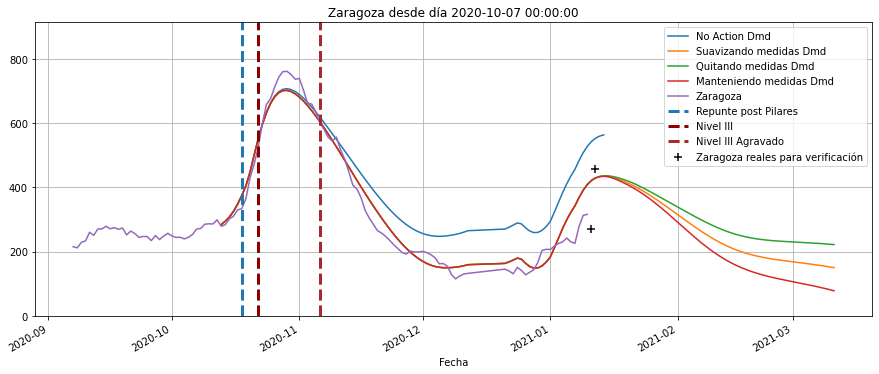

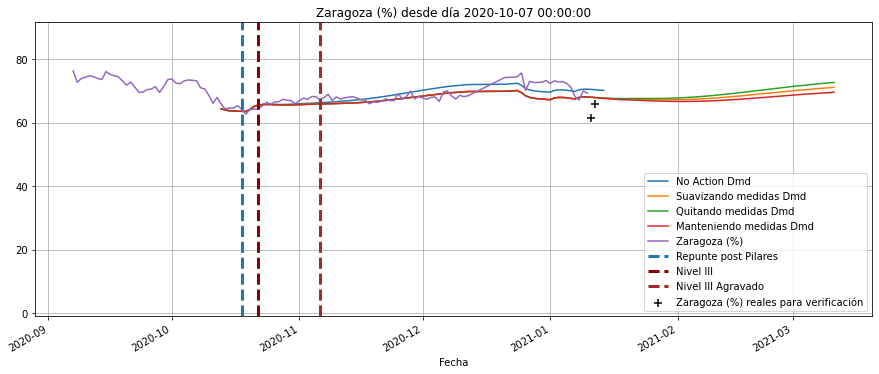

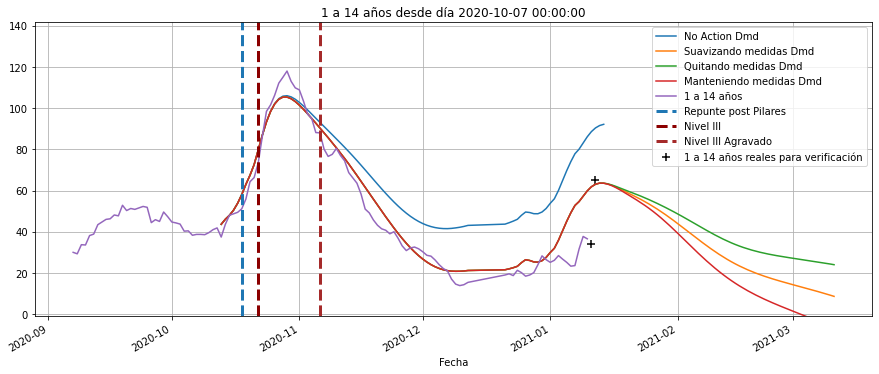

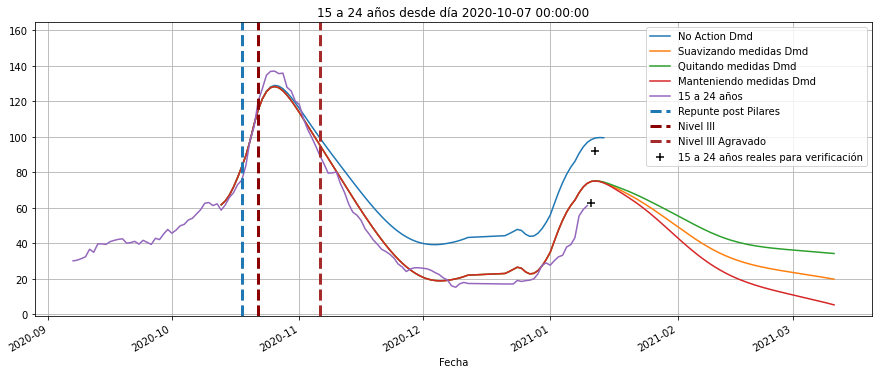

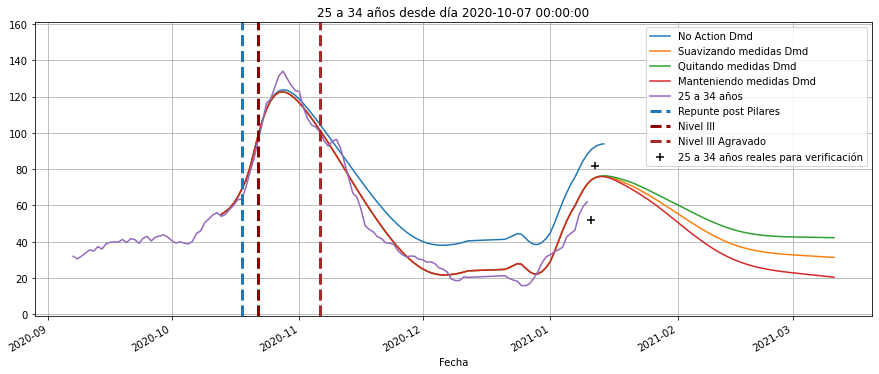

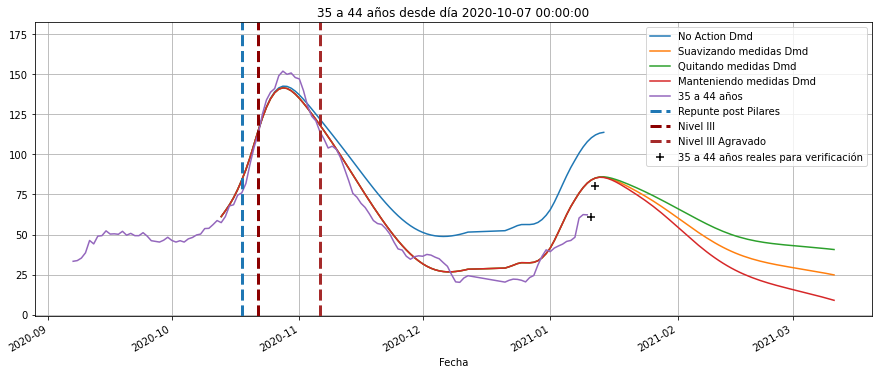

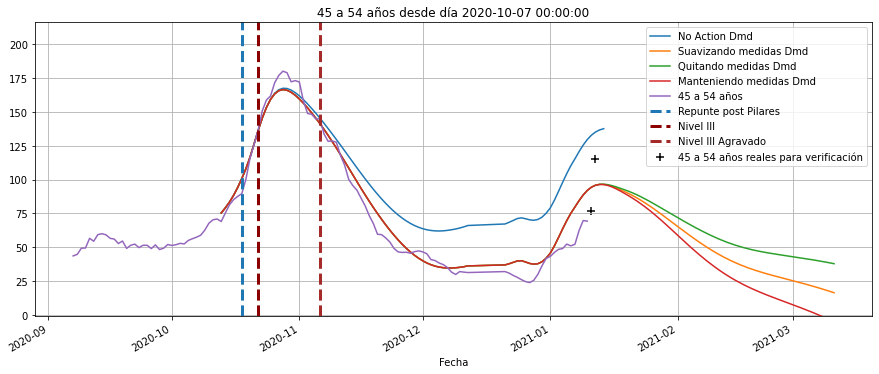

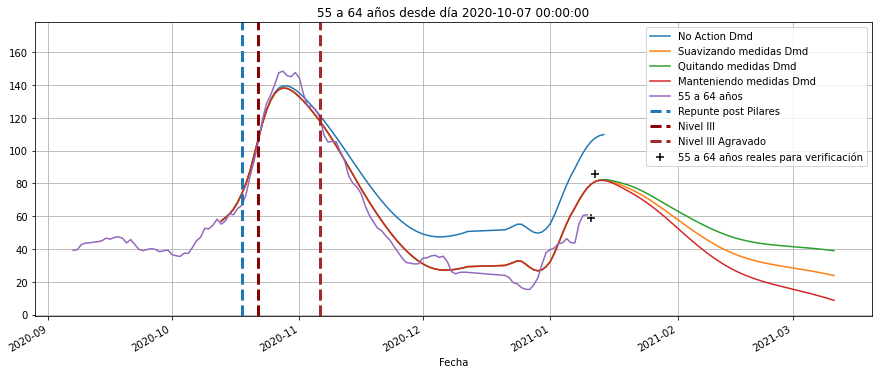

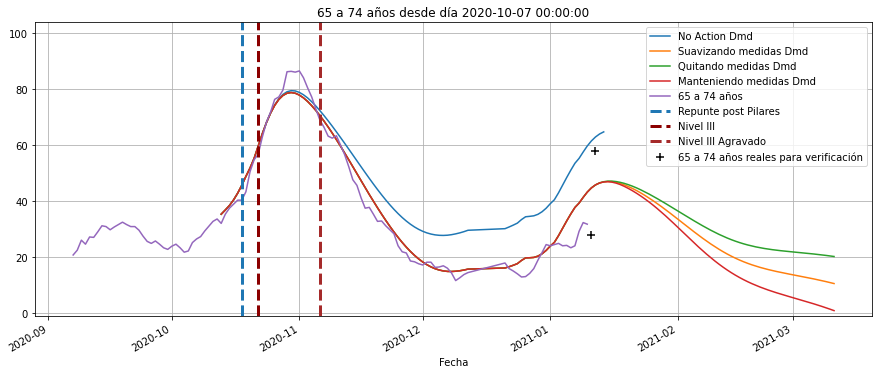

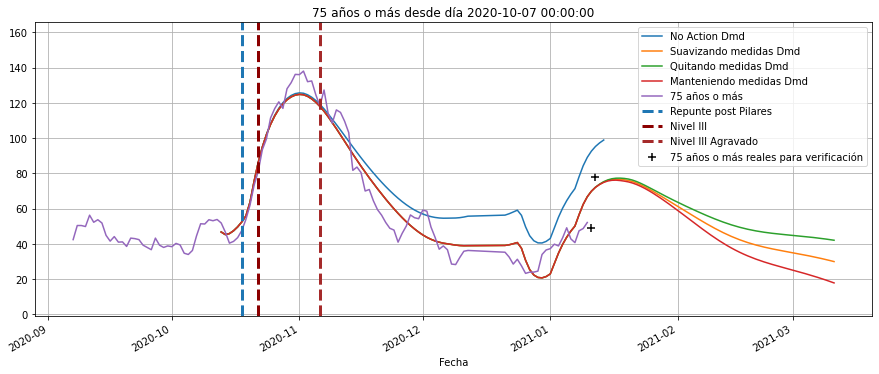

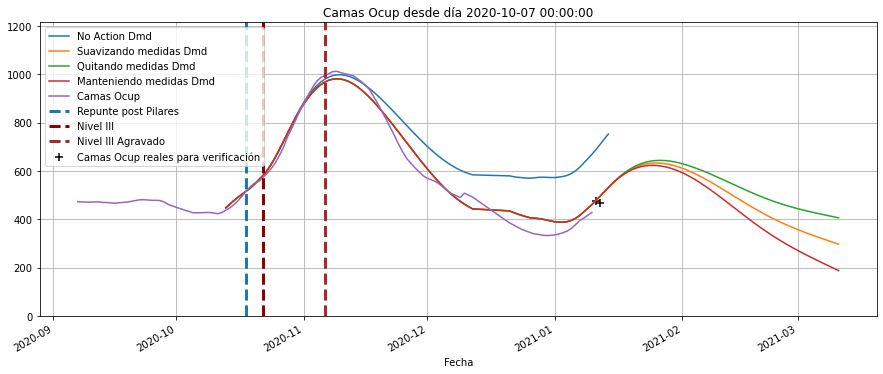

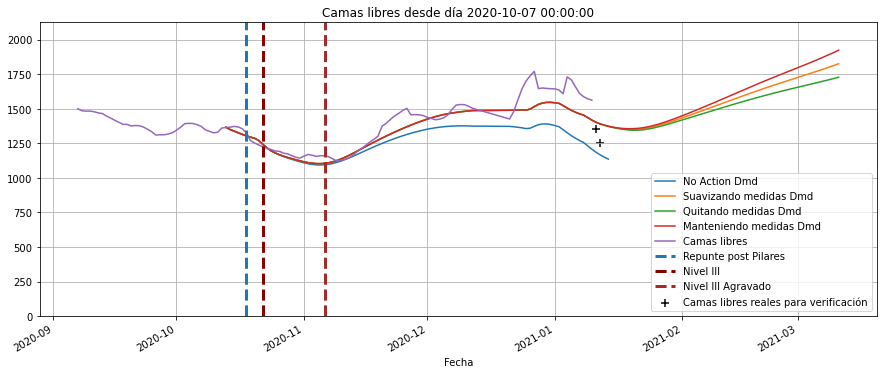

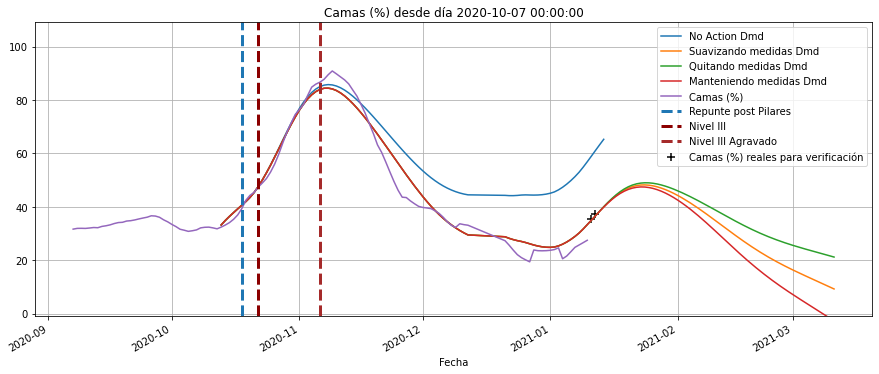

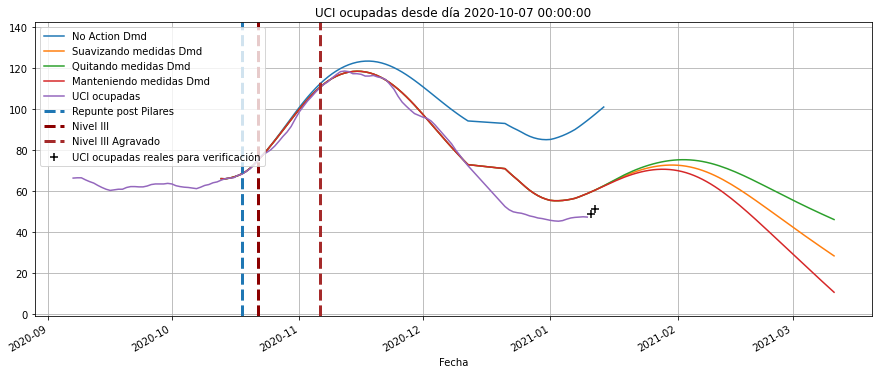

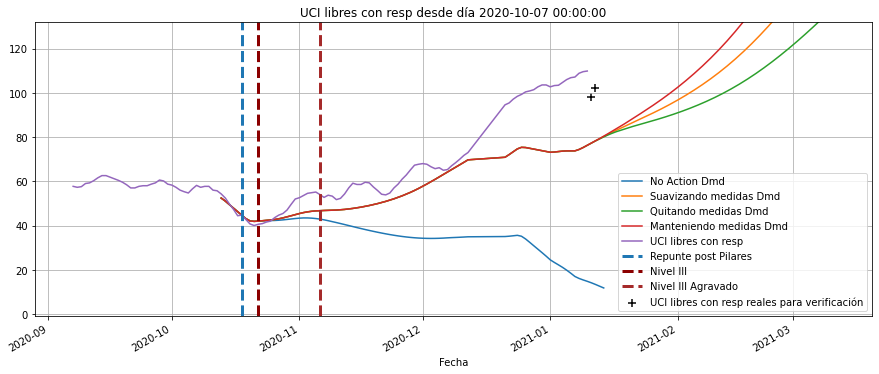

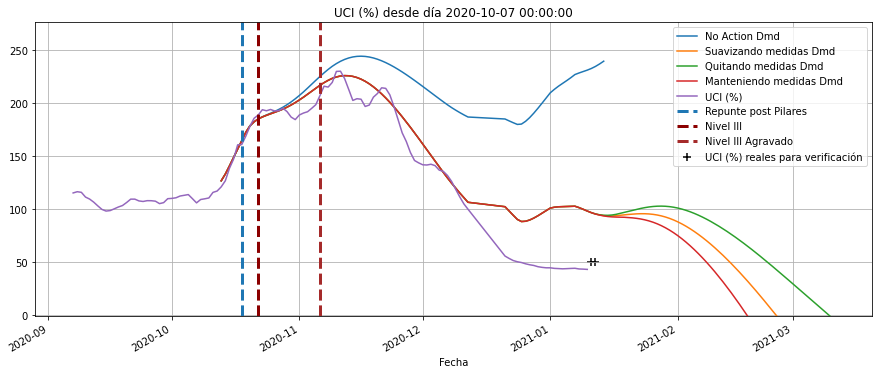

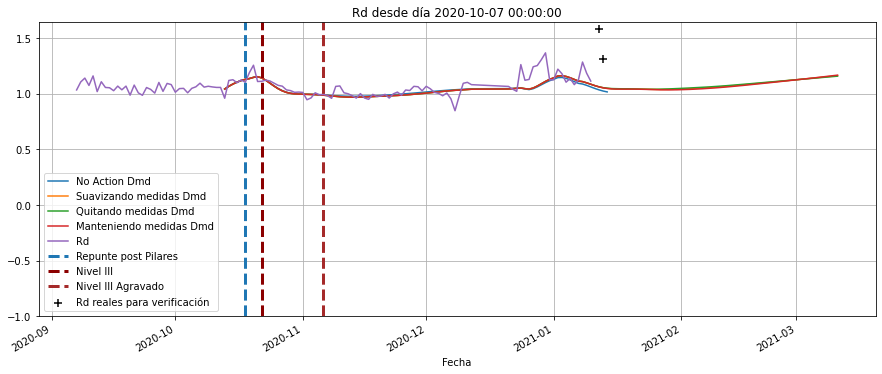

In [41]:
for i in kControl.T.columns:
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #
    ax.plot(noAction.T.loc[:nuevos.index[-1]].index,
            noAction.T.loc[:nuevos.index[-1]][[i]],axes=ax,label='No Action Dmd')
    ax.plot(kControl.T.index,
            kControl.T[[i]],axes=ax,label='Suavizando medidas Dmd')
    ax.plot(rellaxed.T.index,
            rellaxed.T[[i]],axes=ax,label='Quitando medidas Dmd')
    ax.plot(hard.T.index,
            hard.T[[i]],axes=ax,label='Manteniendo medidas Dmd')
    X_prima.T.shift(0).loc['2020-9-7':,i].plot(ax=ax,label='{}'.format(i))
    ax.scatter(nuevos.loc['2020-9-7':].index,
            nuevos.loc['2020-9-7':,[i]],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    plt.title("{} desde día {}".format(i,x1.index[0]))
    plt.legend()
    plt.grid()
    plt.ylim(bottom=-1,top=1.2*X_prima.T.loc['2020-9-7':,i].max())
    plt.show()
  

In [42]:
import datetime as datetime

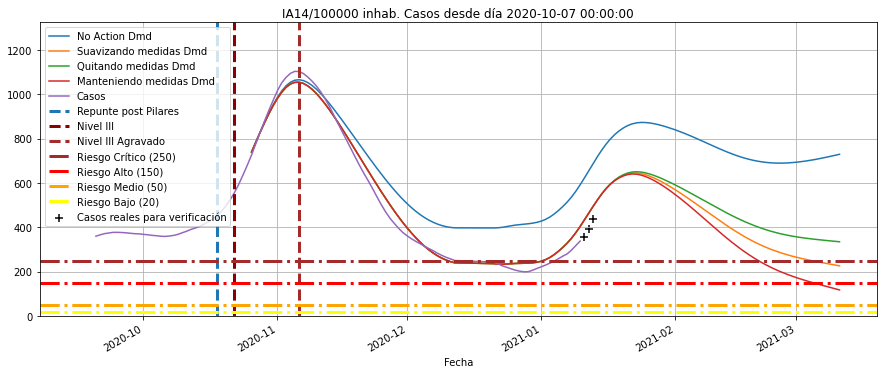

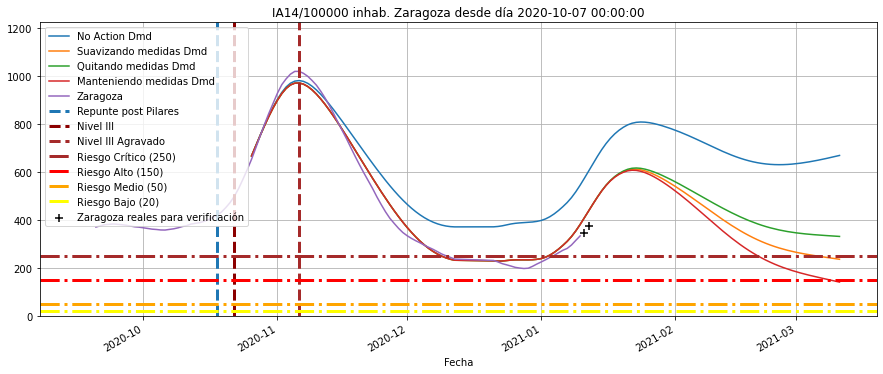

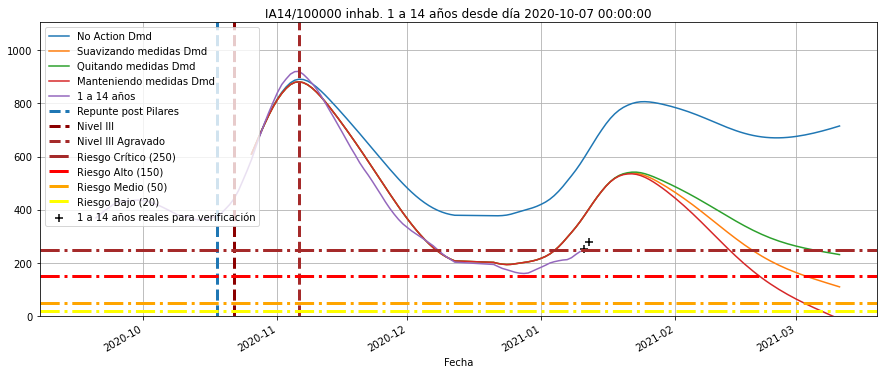

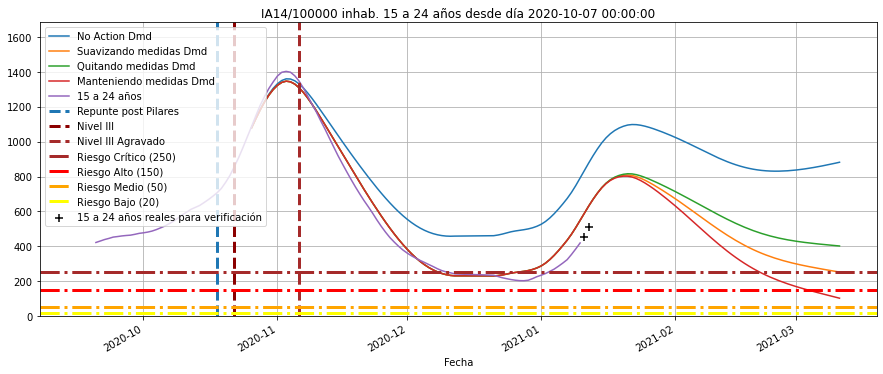

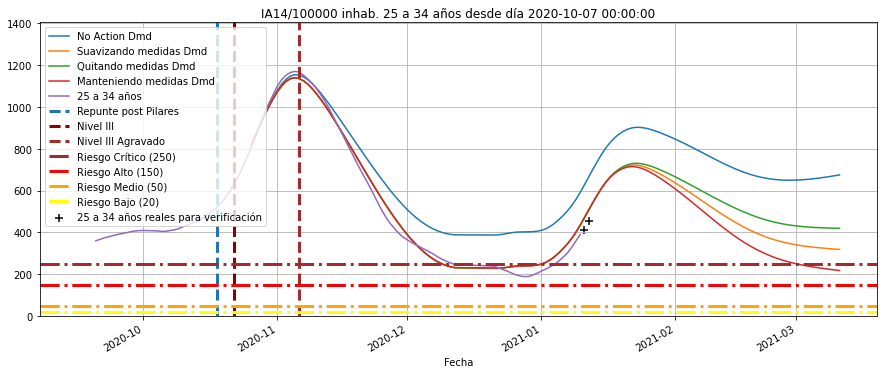

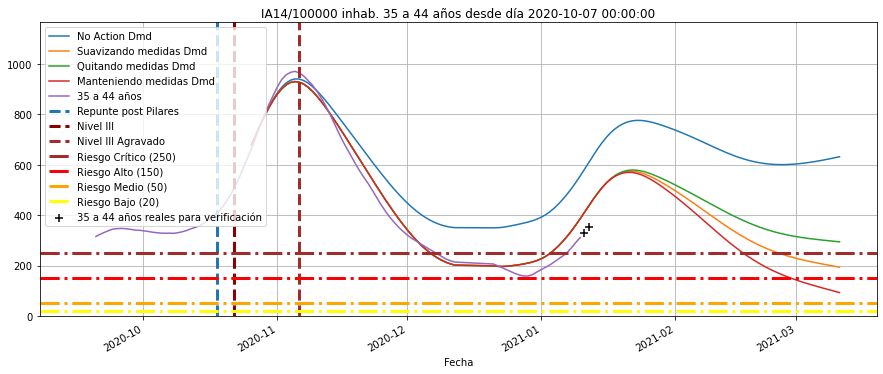

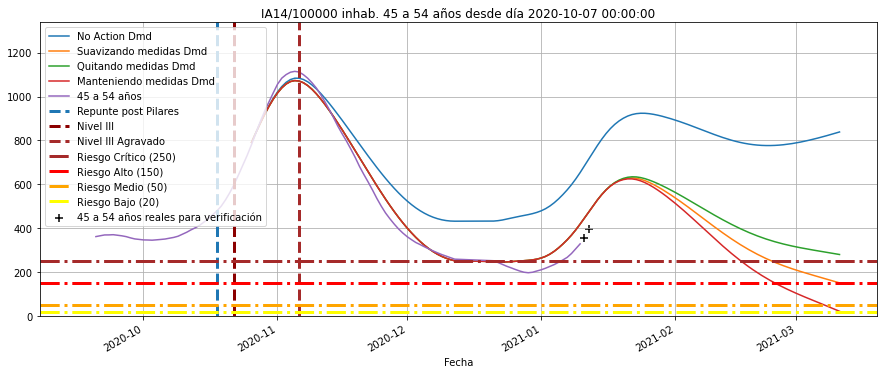

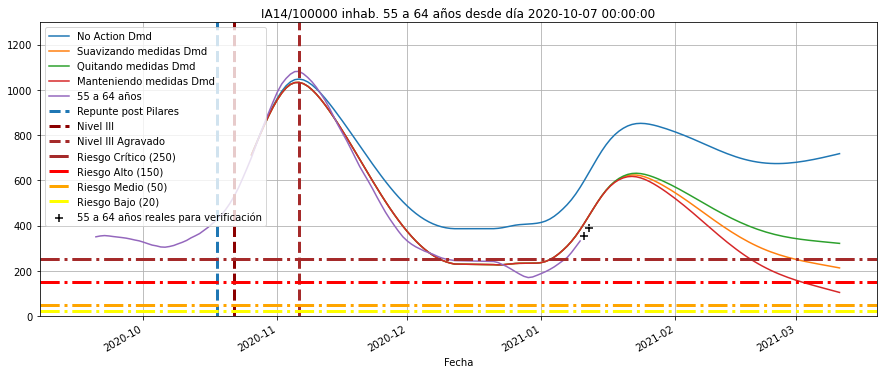

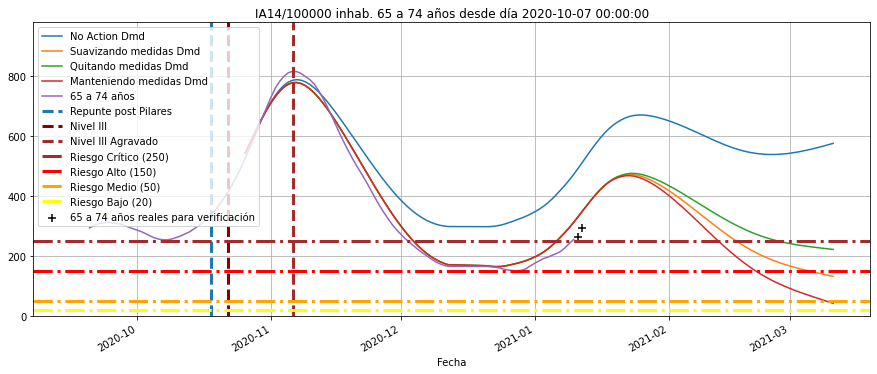

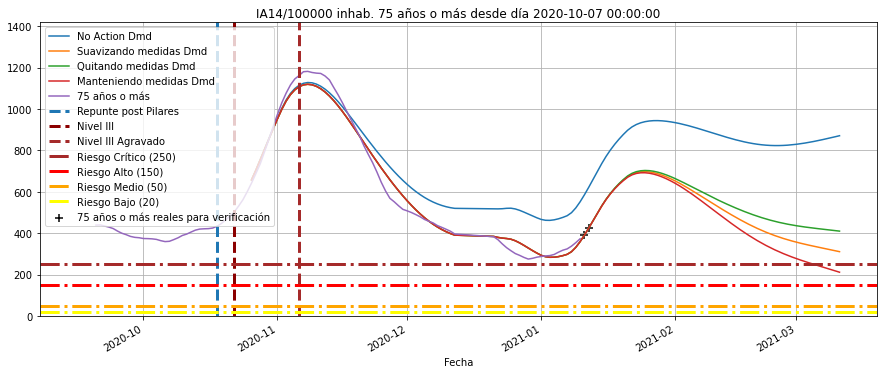

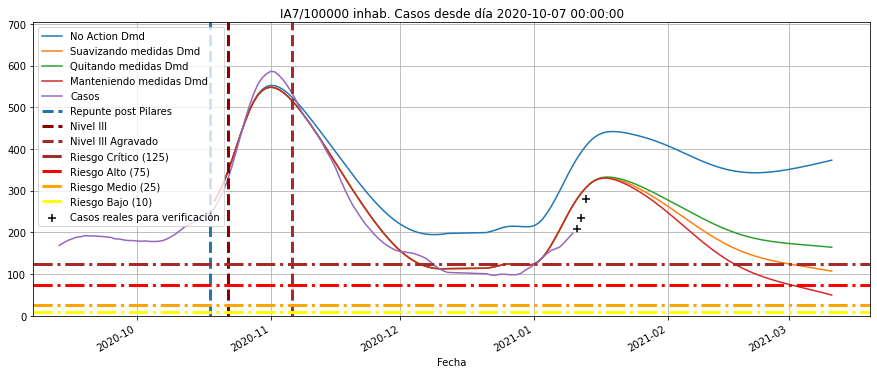

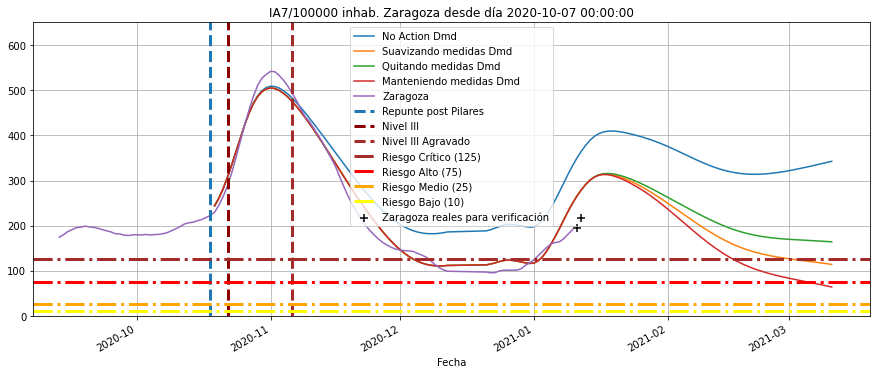

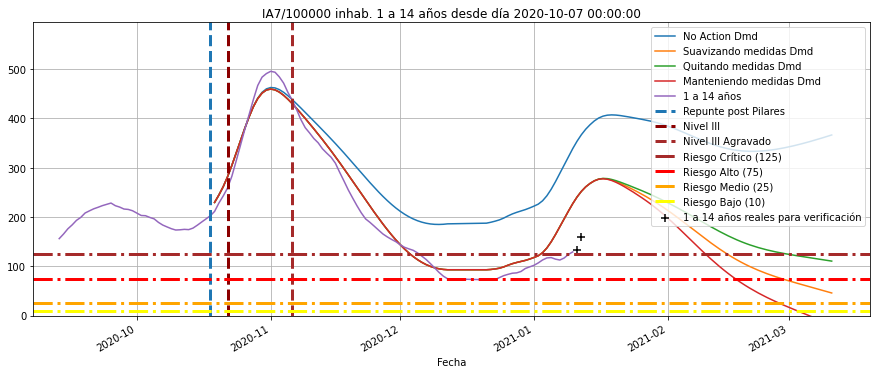

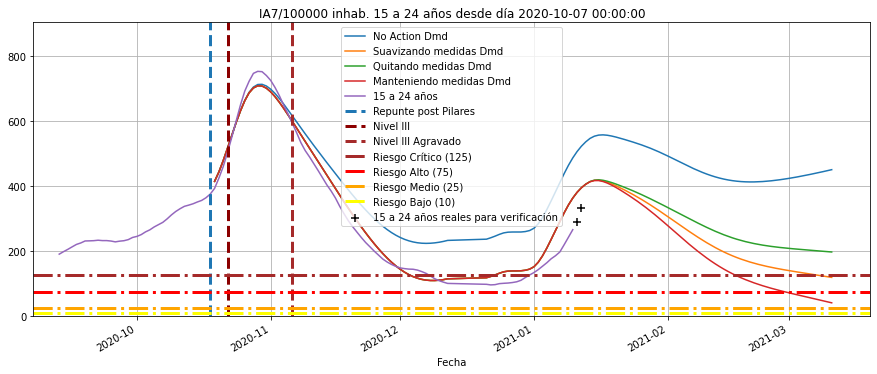

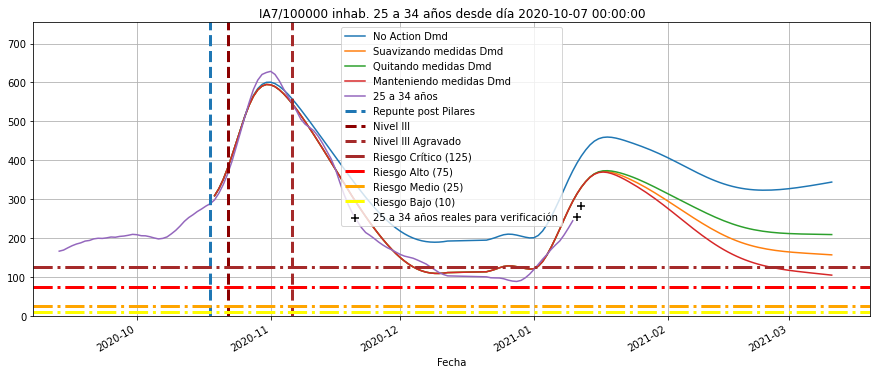

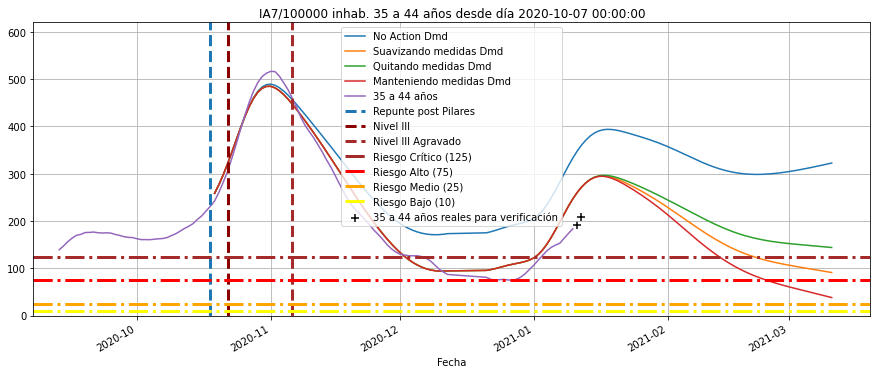

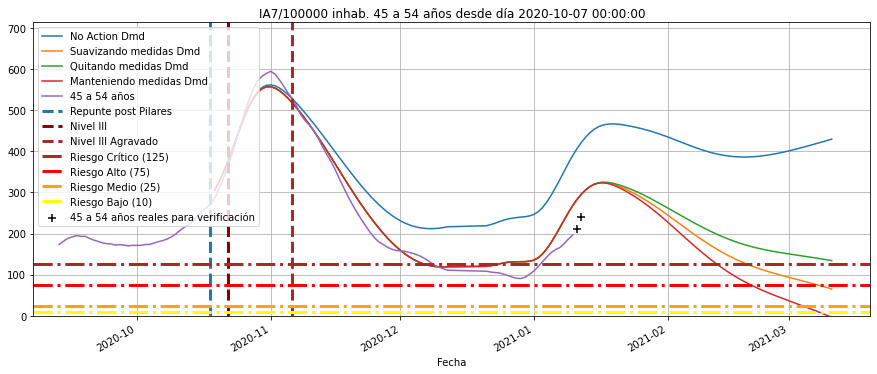

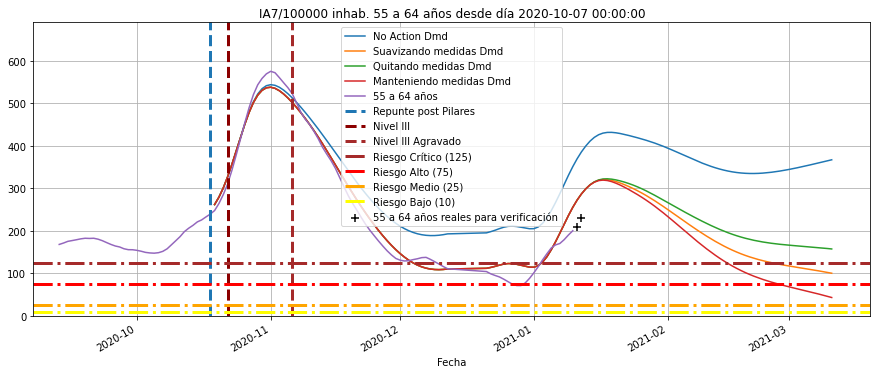

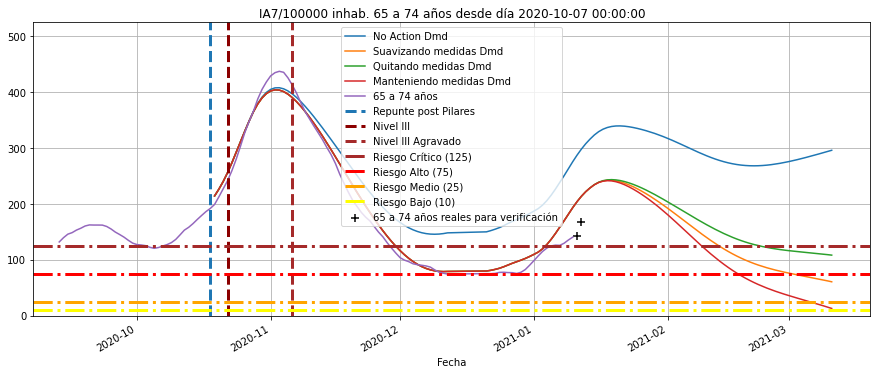

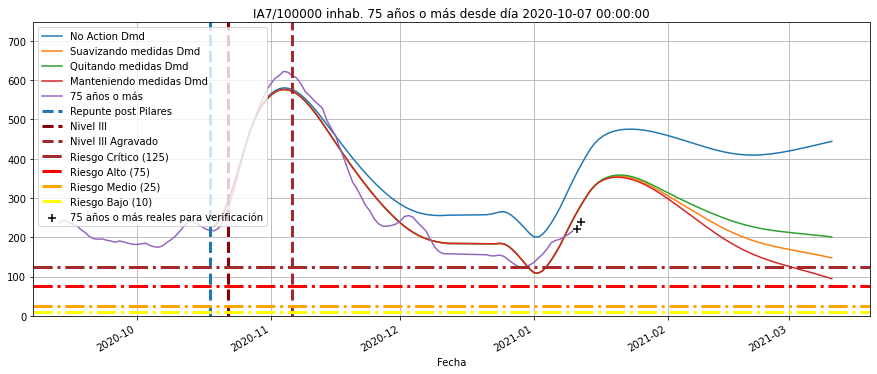

In [43]:
coef = {
    'Casos':13.19,
    #'test coresp':13,
    #'Nº de pacientes a los que se ha realizado pruebas':13,
    #'Asintomáticos':13,
    'Zaragoza':9.6,
    '1 a 14 años':1.58,
    '15 a 24 años':1.24,
    '25 a 34 años':1.42,
    '35 a 44 años':2.01,
    '45 a 54 años':2.06, 
    '55 a 64 años':1.77, 
    '65 a 74 años':1.35,
    '75 años o más':1.50,
}
for i in coef.keys():
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #
    ax.plot(noAction.T.index,
            noAction.T[[i]].rolling(14,center=False).sum()/coef[i],axes=ax,label='No Action Dmd')
    ax.plot(kControl.T.index,
            kControl.T[[i]].rolling(14,center=False).sum()/coef[i],axes=ax,label='Suavizando medidas Dmd')
    ax.plot(rellaxed.T.index,
            rellaxed.T[[i]].rolling(14,center=False).sum()/coef[i],axes=ax,label='Quitando medidas Dmd')
    ax.plot(hard.T.index,
            hard.T[[i]].rolling(14,center=False).sum()/coef[i],axes=ax,label='Manteniendo medidas Dmd')
    (X_prima.T.shift(0).loc['2020-9-7':,i].rolling(14,center=False).sum()/coef[i]).plot(ax=ax,label='{}'.format(i))
    #ax.plot(total.loc['2020-9-7':].index,
    #            (total.rolling(14,center=False).sum()/coef[i]).loc['2020-9-7':,[i]],
    #            axes=ax,label='Desde datos diarios'.format(i))
    ax.scatter((pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)).T.loc[nuevos.index[0]:].index,
            ((pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)).T[[i]].rolling(14,center=False).sum()/coef[i]
            ).loc[nuevos.index[0]:],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    ax.axhline(250,lw=3,ls='-.',c='brown',label='Riesgo Crítico (250)')
    ax.axhline(150,lw=3,ls='-.',c='red',label='Riesgo Alto (150)')
    ax.axhline(50,lw=3,ls='-.',c='orange',label='Riesgo Medio (50)')
    ax.axhline(20,lw=3,ls='-.',c='yellow',label='Riesgo Bajo (20)')
    plt.title("IA14/100000 inhab. {} desde día {}".format(i,x1.index[0]))
    plt.legend()
    plt.grid()
    plt.ylim(bottom=-1,top=1.2*(X_prima.T.loc['2020-9-7':,i].rolling(14,center=False).sum()/coef[i]).max())
    plt.xlim(left=datetime.datetime(2020, 9, 7))
    plt.show()

for i in coef.keys():
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #
    ax.plot(noAction.T.index,
            noAction.T[[i]].rolling(7,center=False).sum()/coef[i],axes=ax,label='No Action Dmd')
    ax.plot(kControl.T.index,
            kControl.T[[i]].rolling(7,center=False).sum()/coef[i],axes=ax,label='Suavizando medidas Dmd')
    ax.plot(rellaxed.T.index,
            rellaxed.T[[i]].rolling(7,center=False).sum()/coef[i],axes=ax,label='Quitando medidas Dmd')
    ax.plot(hard.T.index,
            hard.T[[i]].rolling(7,center=False).sum()/coef[i],axes=ax,label='Manteniendo medidas Dmd')
    (X_prima.T.shift(0).loc['2020-9-7':,i].rolling(7,center=False).sum()/coef[i]).plot(ax=ax,label='{}'.format(i))
    #(pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1).T.loc['2020-9-7':,i].rolling(7,center=False).sum()/coef[i]).plot(ax=ax,label='{}'.format(i))
    #ax.plot(total.loc['2020-9-7':].index,
    #            (total.rolling(14,center=False).sum()/coef[i]).loc['2020-9-7':,[i]],
    #            axes=ax,label='Desde datos diarios'.format(i))
    ax.scatter((pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)).T.loc[nuevos.index[0]:].index,
            ((pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)).T[[i]].rolling(7,center=False).sum()/coef[i]
            ).loc[nuevos.index[-0]:],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    ax.axhline(125,lw=3,ls='-.',c='brown',label='Riesgo Crítico (125)')
    ax.axhline(75,lw=3,ls='-.',c='red',label='Riesgo Alto (75)')
    ax.axhline(25,lw=3,ls='-.',c='orange',label='Riesgo Medio (25)')
    ax.axhline(10,lw=3,ls='-.',c='yellow',label='Riesgo Bajo (10)')
    plt.title("IA7/100000 inhab. {} desde día {}".format(i,x1.index[0]))
    plt.legend()
    plt.grid()
    plt.ylim(bottom=-1,top=1.2*(X_prima.T.loc['2020-9-7':,i].rolling(7,center=False).sum()/coef[i]).max())
    plt.xlim(left=datetime.datetime(2020, 9, 7))
    plt.show()
  

In [44]:
pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)
#nuevos.T.shift(0).loc[X_prima.index[0]:]
#X_prima
i='Casos'
((pd.concat([diario.T,nuevos.T.loc[X_prima.index]],axis=1)).T[[i]].rolling(14,center=False).sum()/coef[i]).loc[X_prima.T.index[-5]:].round(0)

Casos
Fecha            
2021-01-06  317.0
2021-01-07  324.0
2021-01-08  365.0
2021-01-09  392.0
2021-01-10  403.0
2021-01-11  415.0
2021-01-12  435.0
2021-01-13  469.0
2021-01-14    NaN

In [45]:
noAction2 = noAction *repartoDiaSemana.loc[noAction.T.index.dayofweek+1].T.values
kControl2 = kControl *repartoDiaSemana.loc[kControl.T.index.dayofweek+1].T.values
rellaxed2 = rellaxed *repartoDiaSemana.loc[rellaxed.T.index.dayofweek+1].T.values
hard2 = hard *repartoDiaSemana.loc[hard.T.index.dayofweek+1].T.values
media2 = ((rellaxed.clip(lower=0)+kControl.clip(lower=0)+hard.clip(lower=0))/3.)*repartoDiaSemana.loc[rellaxed.T.index.dayofweek+1].T.values

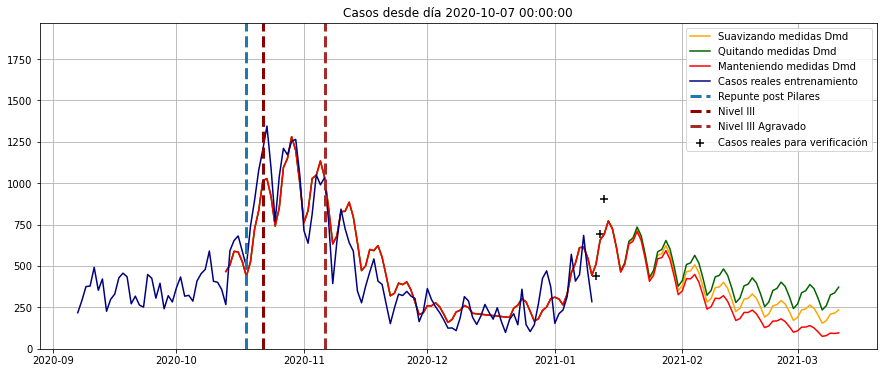

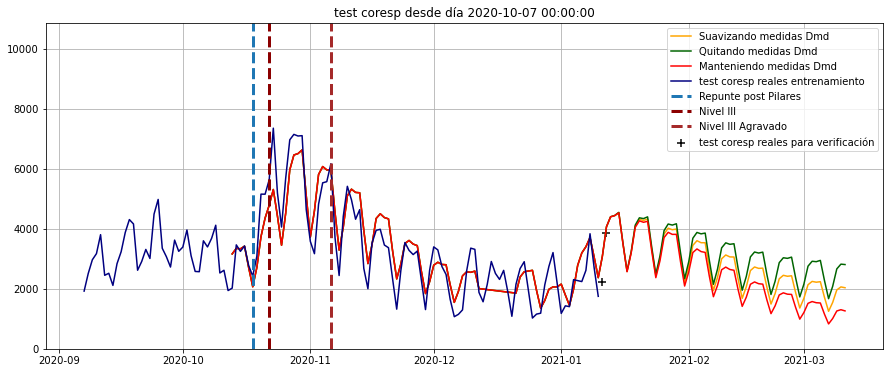

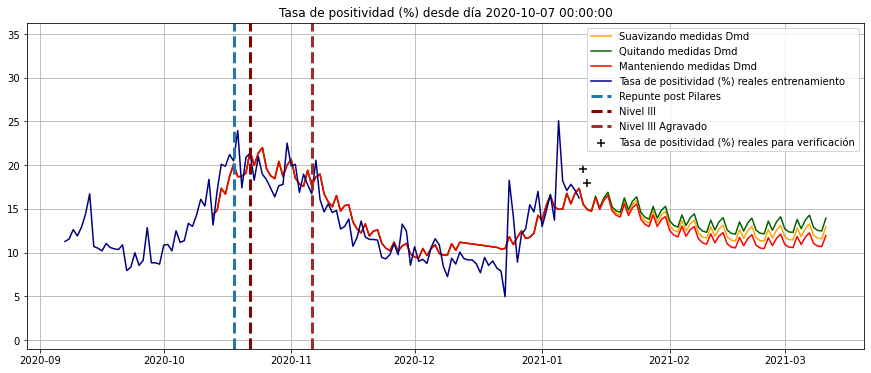

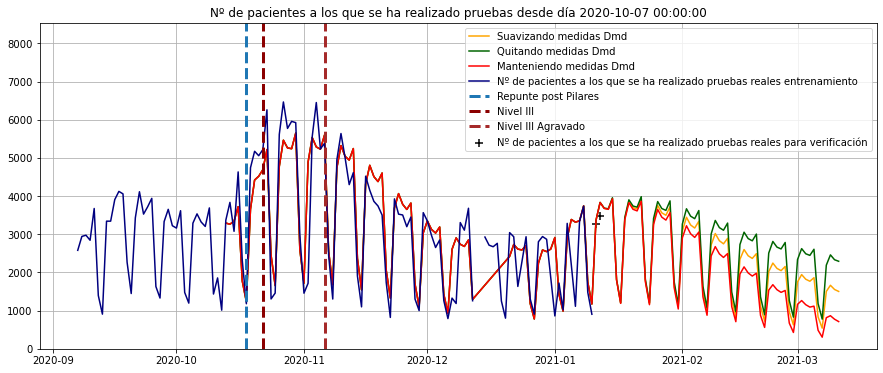

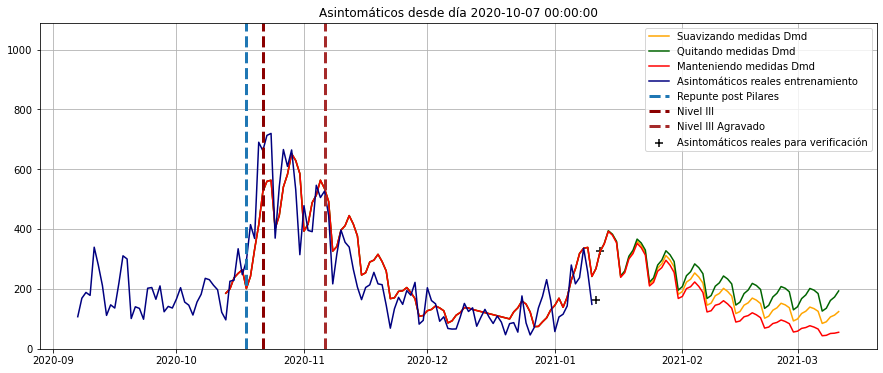

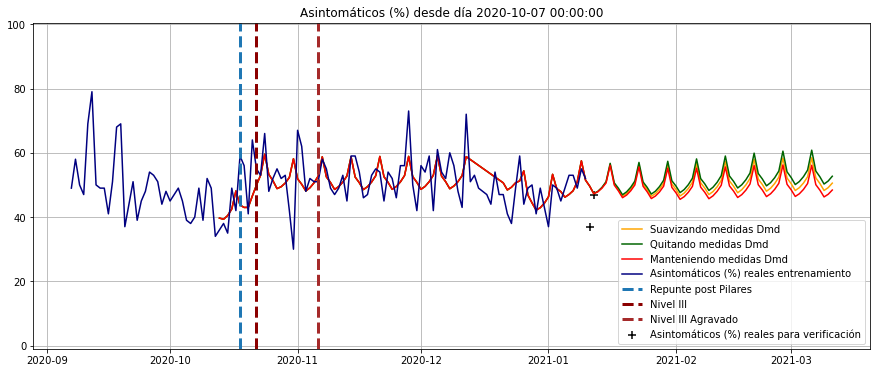

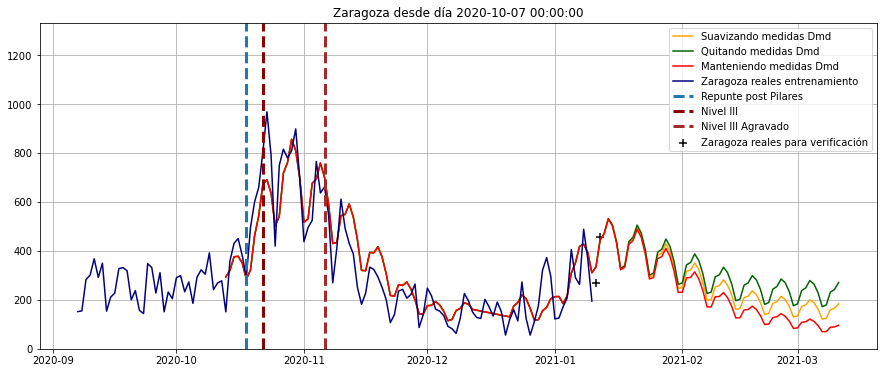

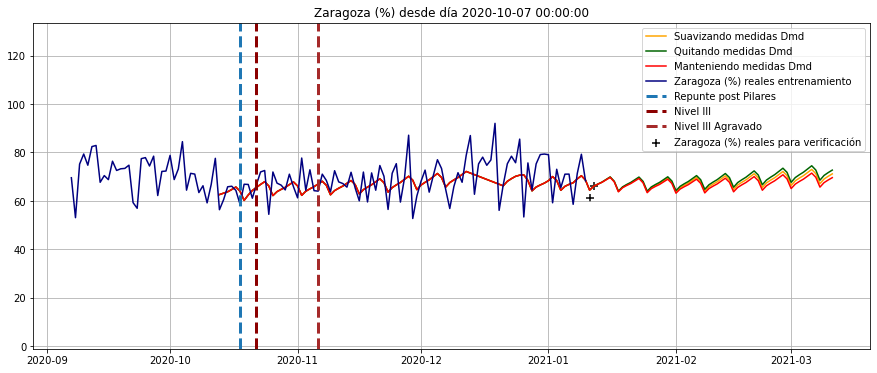

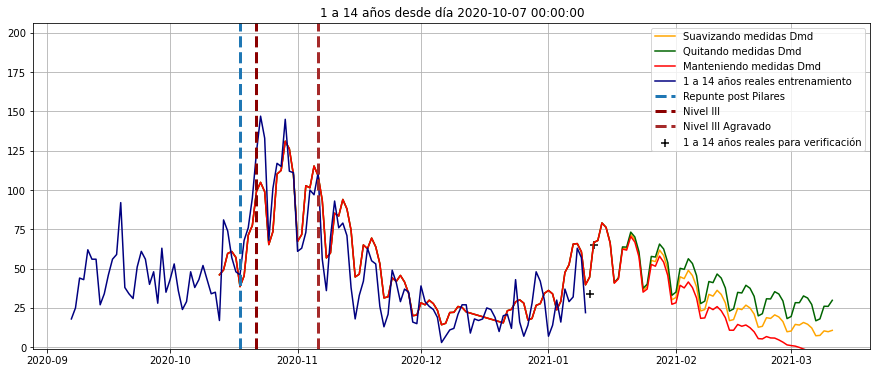

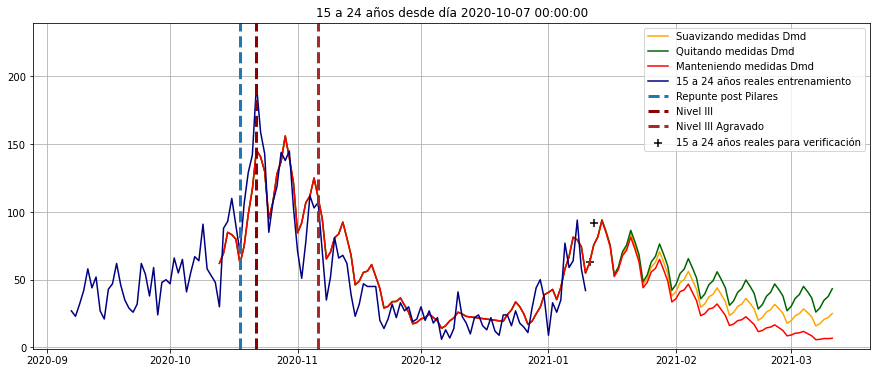

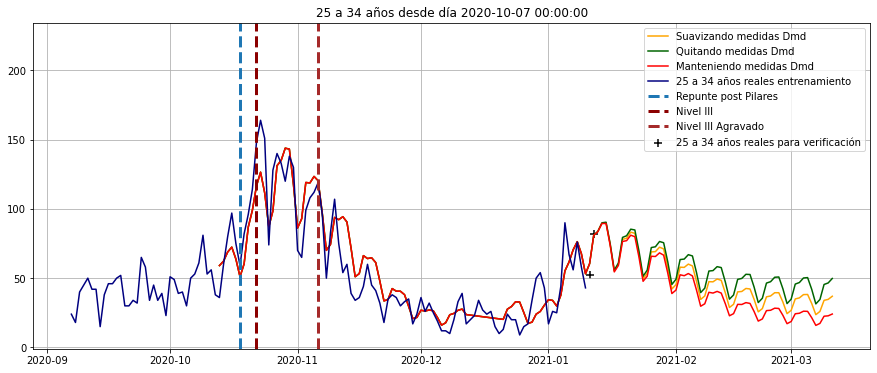

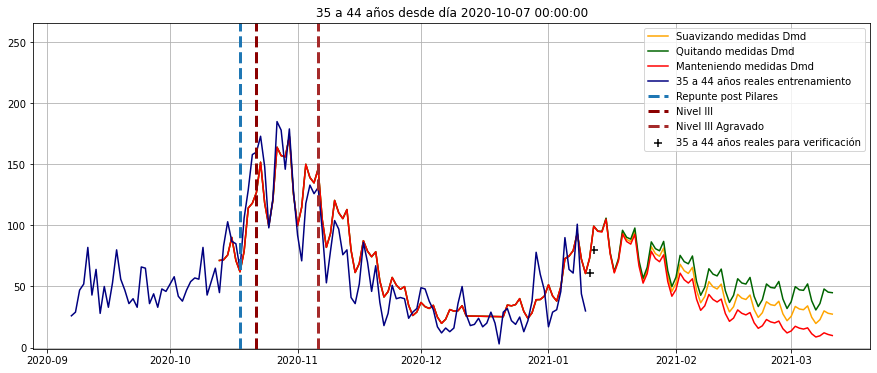

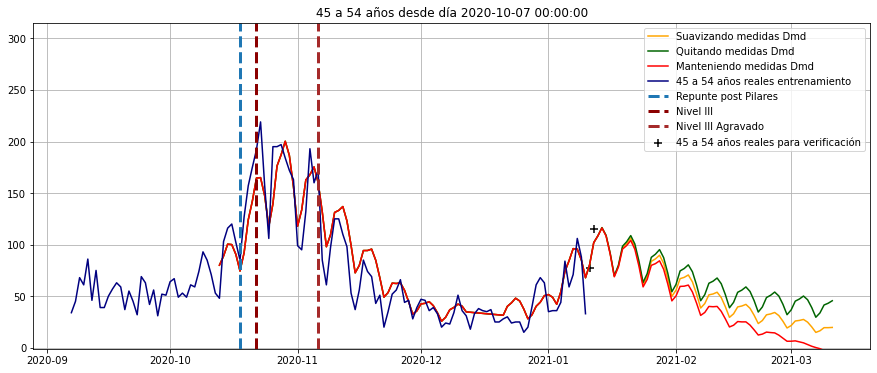

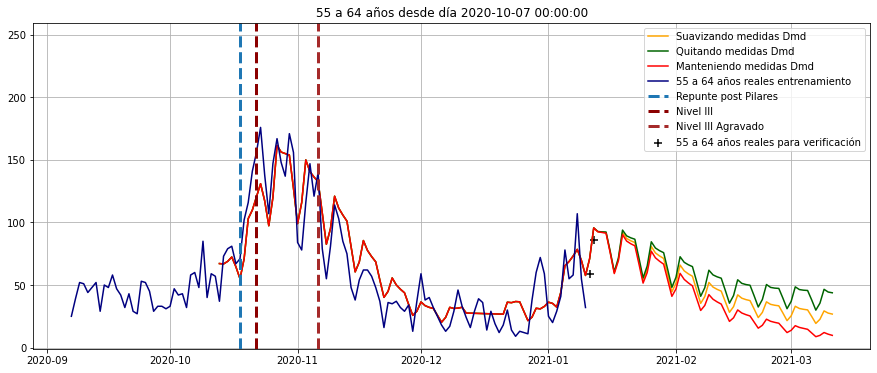

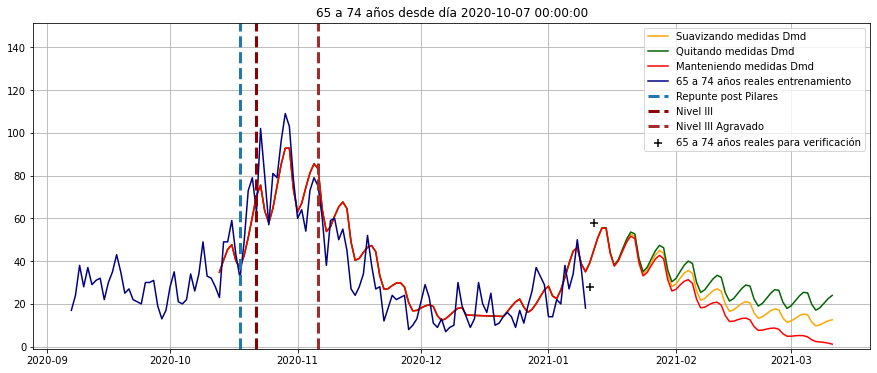

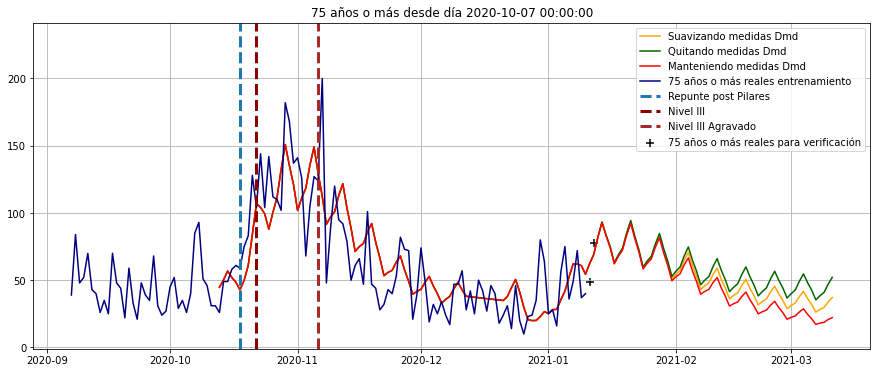

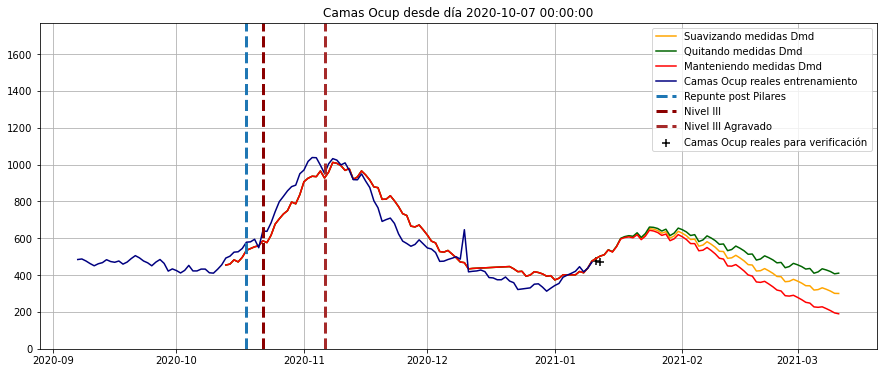

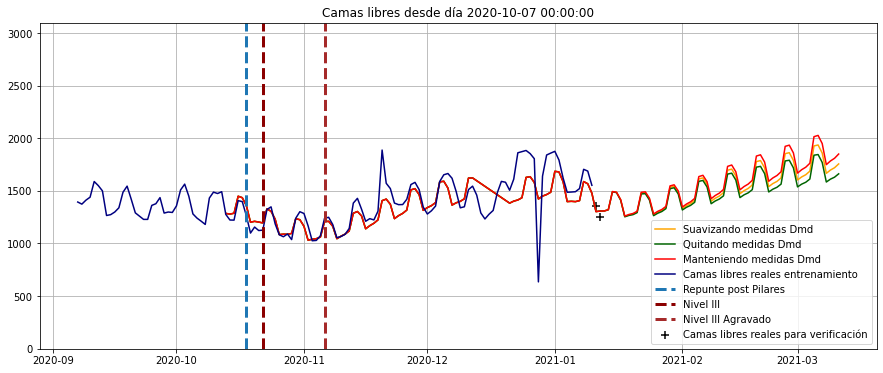

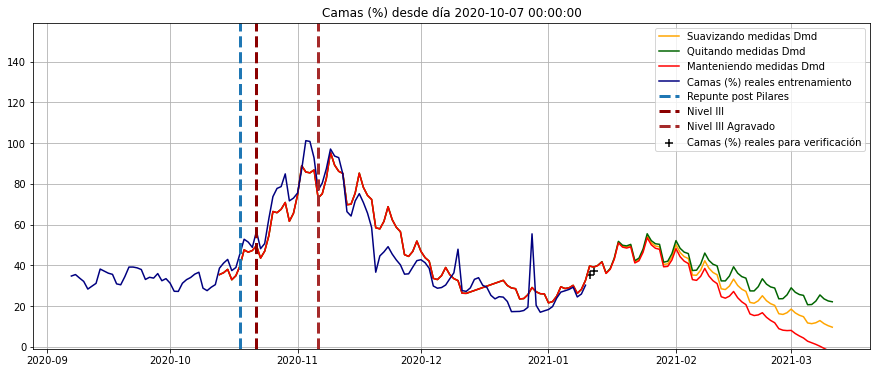

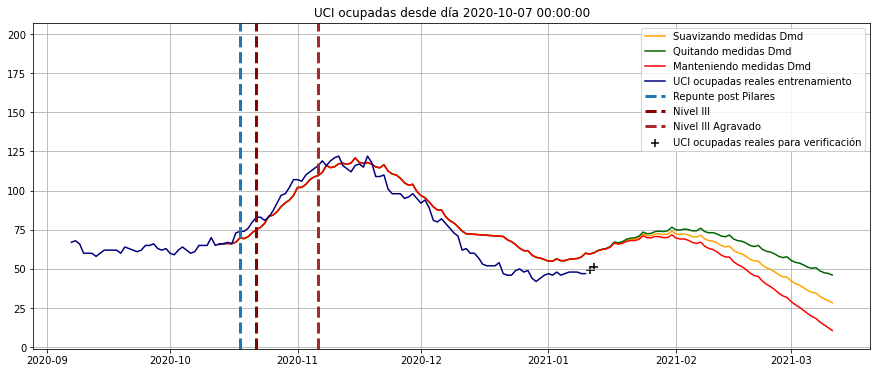

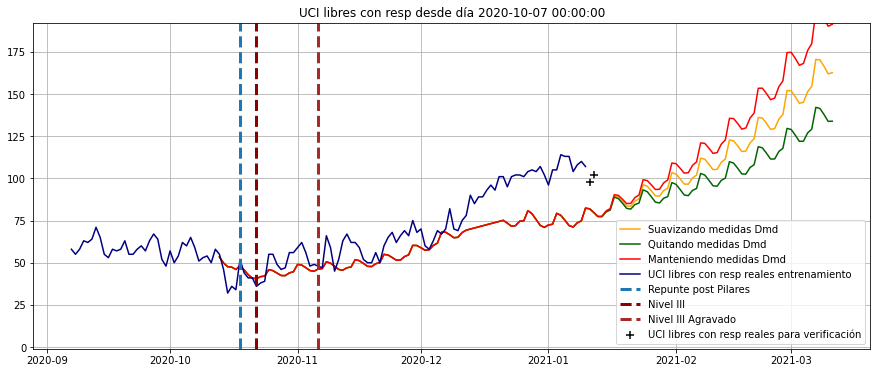

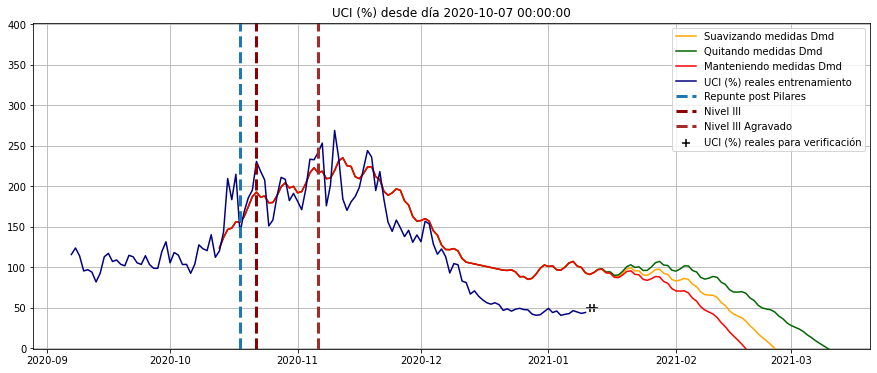

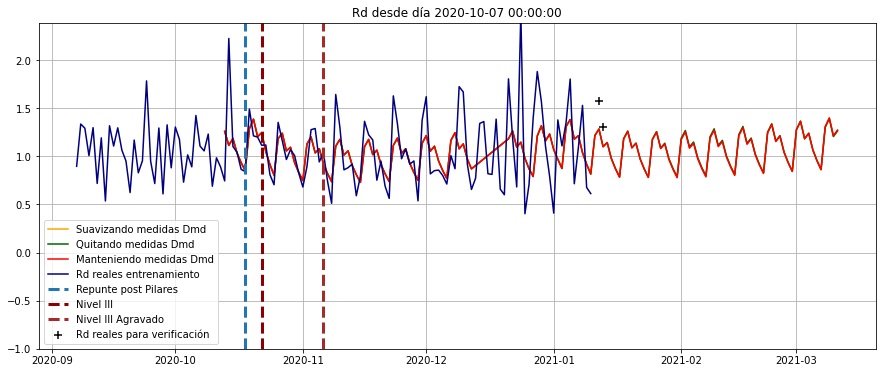

In [46]:
for i in kControl.T.columns:
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #ax.plot(noAction2.T.index,
    #        noAction2.T[[i]],axes=ax,label='No Action Dmd')
    ax.plot(kControl2.T.index,
            kControl2.T[[i]],axes=ax,label='Suavizando medidas Dmd',c='orange')
    ax.plot(rellaxed2.T.index,
            rellaxed2.T[[i]],axes=ax,label='Quitando medidas Dmd',c='darkgreen')
    ax.plot(hard2.T.index,
            hard2.T[[i]],axes=ax,label='Manteniendo medidas Dmd',c='red')    
    #ax.plot(media2.T.index,
    #        media2.T[[i]],axes=ax,label='media de Dmd',c='orange',lw=5,ls='--')
    ax.plot(diario.loc['2020-9-7':].index,
        diario.loc['2020-9-7':,[i]],axes=ax,label='{} reales entrenamiento'.format(i),c='navy')
    #X_prima.T.loc['2020-9-7':,i].plot(ax=ax,label='{}'.format(i))
    ax.scatter(nuevos.loc['2020-9-7':].index,
            nuevos.loc['2020-9-7':,[i]],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    plt.legend()
    plt.title("{} desde día {}".format(i,x1.index[0]))
    plt.ylim(bottom=-1,top=1.75*X_prima.T.loc['2020-9-7':,i].max())
    plt.grid()
    plt.show()
  

In [47]:
kControl2.index

Index(['Casos', 'test coresp', 'Tasa de positividad (%)',
       'Nº de pacientes a los que se ha realizado pruebas', 'Asintomáticos',
       'Asintomáticos (%)', 'Zaragoza', 'Zaragoza (%)', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más', 'Camas Ocup',
       'Camas libres', 'Camas (%)', 'UCI ocupadas', 'UCI libres con resp',
       'UCI (%)', 'Rd'],
      dtype='object')

In [48]:
kControl2.loc[['Casos', 'test coresp', 
       'Nº de pacientes a los que se ha realizado pruebas', 'Tasa de positividad (%)',
       'Asintomáticos (%)', 'Zaragoza', 'UCI ocupadas', 'UCI libres con resp', 'Camas Ocup',
       'Camas libres', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más'],'2021-1-10':'2021-1-24'].round(1).T.sort_index(ascending=False).to_excel('kControl.xls')
kControl2.loc[['Casos', 'test coresp', 
       'Nº de pacientes a los que se ha realizado pruebas', 'Tasa de positividad (%)',
       'Asintomáticos (%)', 'Zaragoza', 'UCI ocupadas', 'UCI libres con resp', 'Camas Ocup',
       'Camas libres', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más'],'2021-1-10':'2021-1-24'].round(1).T.sort_index(ascending=False)

<ipython-input-48-b8ad6901ae2c>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  kControl2.loc[['Casos', 'test coresp',


ModuleNotFoundError: No module named 'xlwt'

In [ ]:
hard2.T.loc['2020-10-1':,['Tasa de positividad (%)']].plot()
(hard2.T.loc['2020-10-1':].apply(lambda x: 100.*x.Casos/x['test coresp'],axis=1)).plot()
plt.grid()
plt.show()
kControl2.T.loc[:,['Tasa de positividad (%)']].plot()
(kControl2.T.loc[:].apply(lambda x: 100.*x.Casos/x['test coresp'],axis=1)).plot()
plt.grid()#goto

In [ ]:
diario.loc['2020-10-1':].apply(lambda x: 100.*x.Casos/x['test coresp'],axis=1)

In [ ]:
diario.loc['2020-10-1':,['Tasa de positividad (%)']].plot()

In [ ]:
((kControl2.T-nuevos)*100./nuevos).dropna(axis=0,how='all').dropna(axis=1,how='all').describe().T

In [ ]:
nuevos['Nº de pacientes a los que se ha realizado pruebas']